<a href="https://colab.research.google.com/github/jihandewana/Bank_Customer_Churn/blob/main/Bank_Customer_Churn_JihanDewana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJECT DESCRIPTION AND WORKFLOW**

Customer churn refers to the number or percentage of customers who cease using a business's product or service within a specified time period. This metric is important because it indicates levels of customer satisfaction and loyalty, as well as potential lost revenue and negative impact on brand image if not handled effectively.

In this project, we have data on 10,000 customers at a European bank, including details on their credit scores, balances, products, and whether they have churned. The primary goal is to identify patterns and factors that lead to customers leaving a bank and to predict which customers are likely to churn in the future.

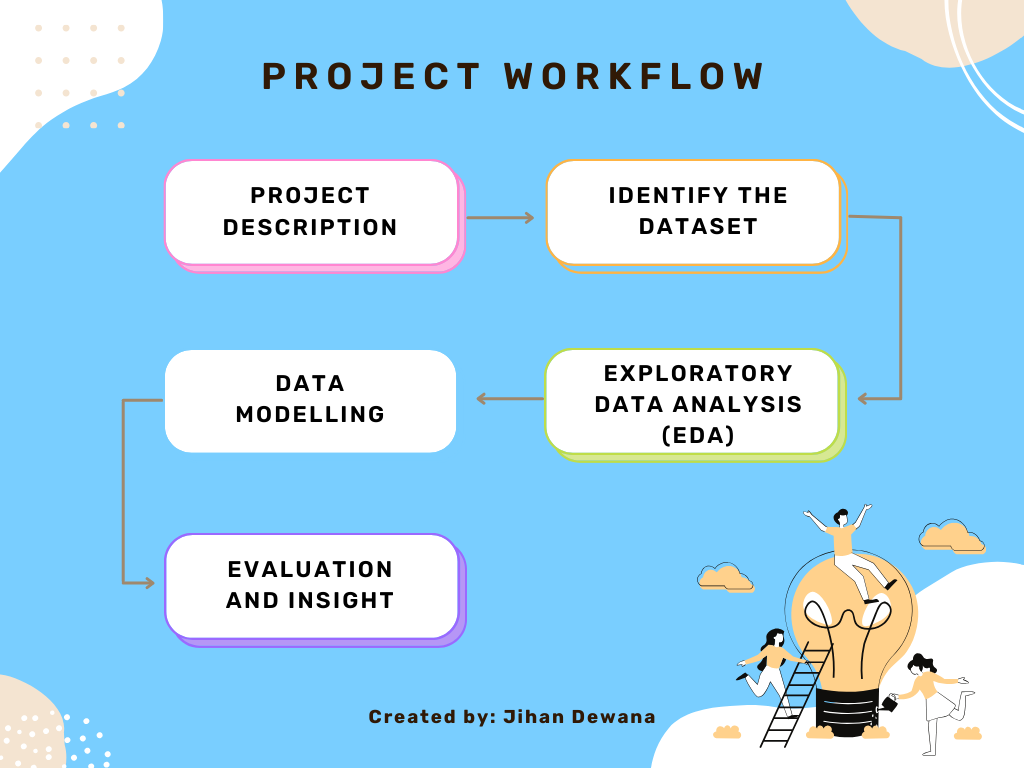

# **IDENTIFY THE DATASET**

Dataset Source from Kaggle

There are the details of the dataset we used in this project.


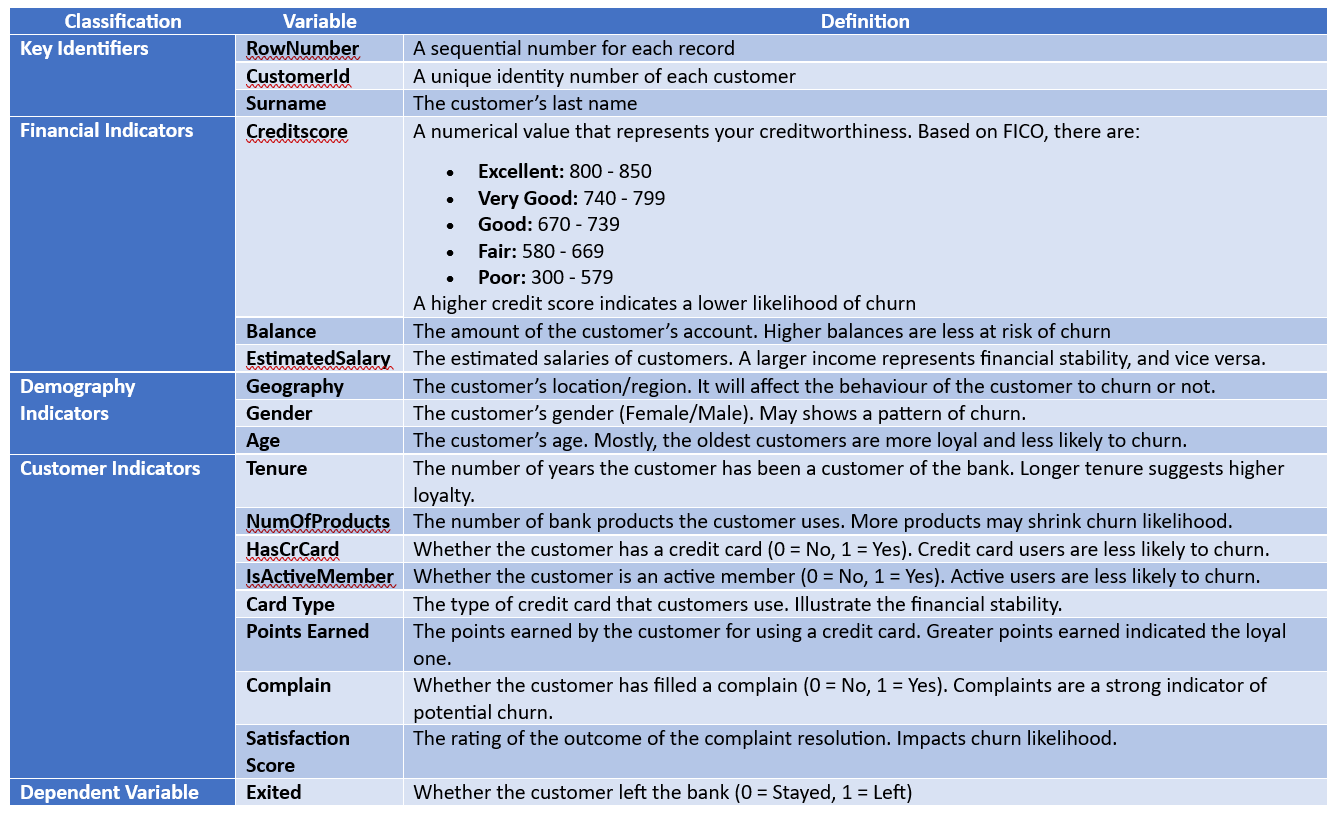

# **EXPLORATORY DATA ANALYSIS (EDA)**

**Exploratory Data Analysis (EDA)** is the crucial first step in any data science project. It's the process of investigating a dataset to summarize its main characteristics, uncover hidden patterns, identify anomalies, and form hypotheses.

**The purpose of EDA** is to:
* Understand the data's structure and content
* Identify missing values and data errors
* Uncover trends and relationships
* Detect outliers and anomalies
* Formulate hypotheses

## IMPORT LIBRARY & LOAD DATASET

In [ ]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import scipy.stats as st
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LogisticRegression
from tabulate import tabulate

In [ ]:
# load dataset
from google.colab import files
uploaded = files.upload()

Saving BankCustomerChurn.csv to BankCustomerChurn.csv


In [ ]:
#read the dataset
import io

data = pd.read_csv('BankCustomerChurn.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


## EDA (1): DATA INFO AND MISSING VALUE CHECKING

In [ ]:
# data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [ ]:
# EDA (1)
## checking there is null/NA data or not
data.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
#Missing Value Identification
def features_with_missing_values(data):
    x = data.isnull().sum().sum()/(data.shape[0]*data.shape[1])*100
    print('Percentage of Total Missing Values is ' ,round(x,2) ,'%')
    print('Missing Value Estimation :')
    for i in data.columns:
        if data[i].isna().sum()>0:
            print('The Feature ',i,' has '+ str(data[i].isna().sum()) + ' missing values')

features_with_missing_values(data)

Percentage of Total Missing Values is  0.0 %
Missing Value Estimation :


In [ ]:
## checking duplicate data
data.duplicated().sum()

np.int64(0)

In [ ]:
## Get descriptive statistics for numerical columns
print(data.describe())

         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000     

EDA uses a combination of statistical and visual methods. These methods are frequently utilized at different levels of analysis: **univariate, bivariate, and multivariate**

## EDA (2) : UNIVARIATE, BIVARIATE & MULTIVARIATE ANALYSIS

### 1.   UNIVARIATE ANALYSIS





The objective of univariate analysis is to examine a single variable at a time to understand its distribution and central tendency.

In [ ]:
# create new database
 ## removing irrelevant columns
irrelevant_columns = ['RowNumber', 'CustomerId', 'Surname']
data = data.drop(irrelevant_columns, axis=1)

In [ ]:
# split the numerical and categorical data
numerical_cols=[]
categorical_cols=[]

for col in data.columns:
  if data[col].dtype in ['int64','float64']:
    unique_values = data[col].unique()
    if len(unique_values) <= 10:
      categorical_cols.append(col)
    else:
      numerical_cols.append(col)
  elif data[col].dtype == 'object': #added criteria for categorical data
    categorical_cols.append(col)

In [ ]:
print("Numerical Columnns",numerical_cols)
print("Categorical Columnns",categorical_cols)

Numerical Columnns ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary', 'Point Earned']
Categorical Columnns ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited', 'Complain', 'Satisfaction Score', 'Card Type']


#### NUMERICAL VARIABLE

A **numerical variable** (also known as a quantitative variable) is a type of data variable that represents a measurable quantity as a number. Or in other words, the value has a numerical meaning and can be used in mathematical operations.

Analyzing numerical variables involves a range of statistical methods, such as descriptive statistics and inferential statistics. But in the univariate analysis, we focused on **descriptive statistics**.

* **Measures of Central Tendency**: These statistics describe the center of the dataset.
  * Mean: The average value.
  * Median: The middle value when the data is sequential.
  * Mode: The most frequent value.
* **Measures of Dispersion (Spread)**: These statistics describe how spread out the data is.
  * Range: The difference between the maximum and minimum values.
  * Standard Deviation: A measure of the average distance from the mean.
  * Interquartile Range (IQR): The range of the middle 50% of the data.
* **Visualizations**:
  * Histograms: Show the frequency distribution of the data.
  * Box plots: Display the five-number summary (minimum, first quartile, median, third quartile, maximum) and help identify outliers.

In [ ]:
# visualization of numerical data
data[numerical_cols].describe()

,CreditScore,Age,Tenure,Balance,EstimatedSalary,Point Earned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,100090.239881,606.515100
std,96.653299,10.487806,2.892174,62397.405202,57510.492818,225.924839
min,350.000000,18.000000,0.000000,0.000000,11.580000,119.000000
25%,584.000000,32.000000,3.000000,0.000000,51002.110000,410.000000
50%,652.000000,37.000000,5.000000,97198.540000,100193.915000,605.000000
75%,718.000000,44.000000,7.000000,127644.240000,149388.247500,801.000000
max,850.000000,92.000000,10.000000,250898.090000,199992.480000,1000.000000


In [ ]:
def plot_distributions(data, ordered_colors):
  numeric_columns=data.columns

  extended_color = (ordered_colors * (len(numeric_columns) // len(ordered_colors) + 1))[:len(numeric_columns)]
  plt.style.use('seaborn-v0_8-whitegrid')
  sns.set_context("notebook", font_scale=1.2)

  for i, col in enumerate(numeric_columns):

    fig, axes = plt.subplots(1, 3, figsize=(18, 5), gridspec_kw={'width_ratios':[2,1,2]})
    fig.suptitle(f'Univariate Analysis of {col}', fontsize=16, weight='bold', y=1.05)

    ## histogram
    sns.histplot(data[col], kde=True, ax=axes[0], color=extended_color[i], bins=30)
    axes[0].set_title(f'{col} Histogram', fontsize=14)
    axes[0].set_xlabel(col, fontsize=12)
    axes[0].set_ylabel('Frequency', fontsize=12)

    mean_val=data[col].mean()
    median_val=data[col].median()
    axes[0].axvline(mean_val, color='red', linestyle='dashed', linewidth=2, label=f'Mean:{mean_val:.2f}')
    axes[0].axvline(median_val, color='blue', linestyle='dashed', linewidth=2, label=f'Median:{median_val:.2f}')
    axes[0].legend(fontsize=10)

    ## boxplot
    sns.boxplot(y=data[col], ax=axes[1], color=extended_color[i], flierprops=dict(marker='o',markerfacecolor='green',markersize=8)) # Corrected keyword here
    axes[1].set_title(f'{col} Boxplot', fontsize=14)
    axes[1].set_ylabel(col, fontsize=12)

    ## Q-Q plot
    st.probplot(data[col], dist='norm', plot=axes[2])
    axes[2].set_title(f'{col} Q-Q Plot', fontsize=14)
    axes[2].set_xlabel('Theoretical Quantiles', fontsize=12)
    axes[2].set_ylabel('Ordered Values', fontsize=12)

    ## Skewnes & Kurtosis
    skewness = data[col].skew()
    kurtosis = data[col].kurtosis()

    stats_text=f'{col} Skewness: {skewness:.2f}\nKurtosis: {kurtosis:.2f}'
    fig.text(0.01, 0.95, stats_text, fontsize=12, bbox=dict(facecolor='white', alpha=0.8, edgecolor='black'))


    plt.tight_layout()
    plt.show()

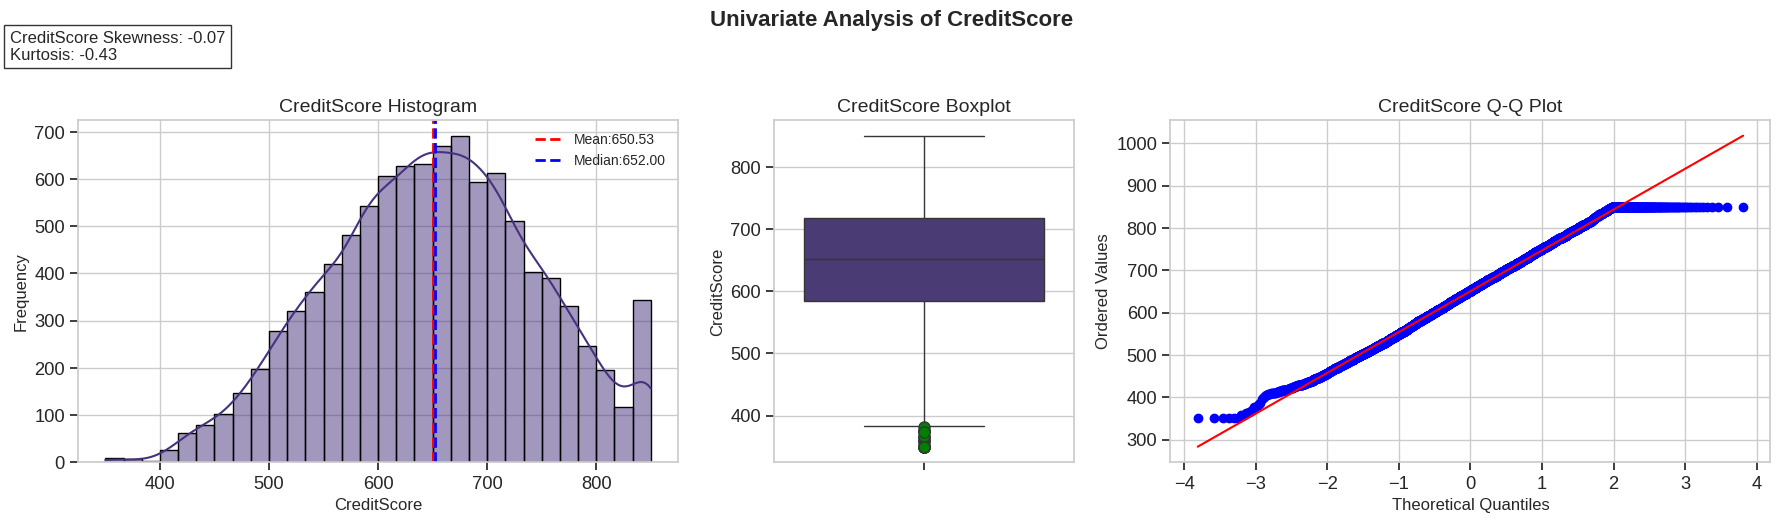

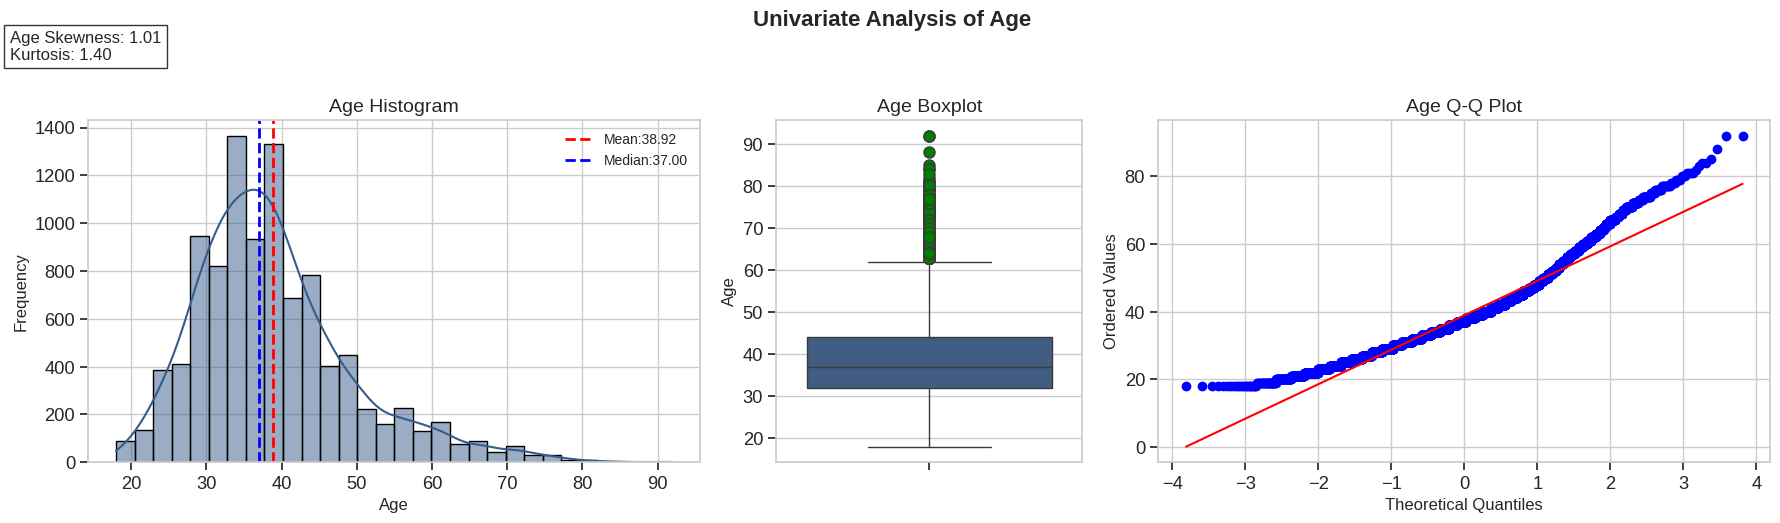

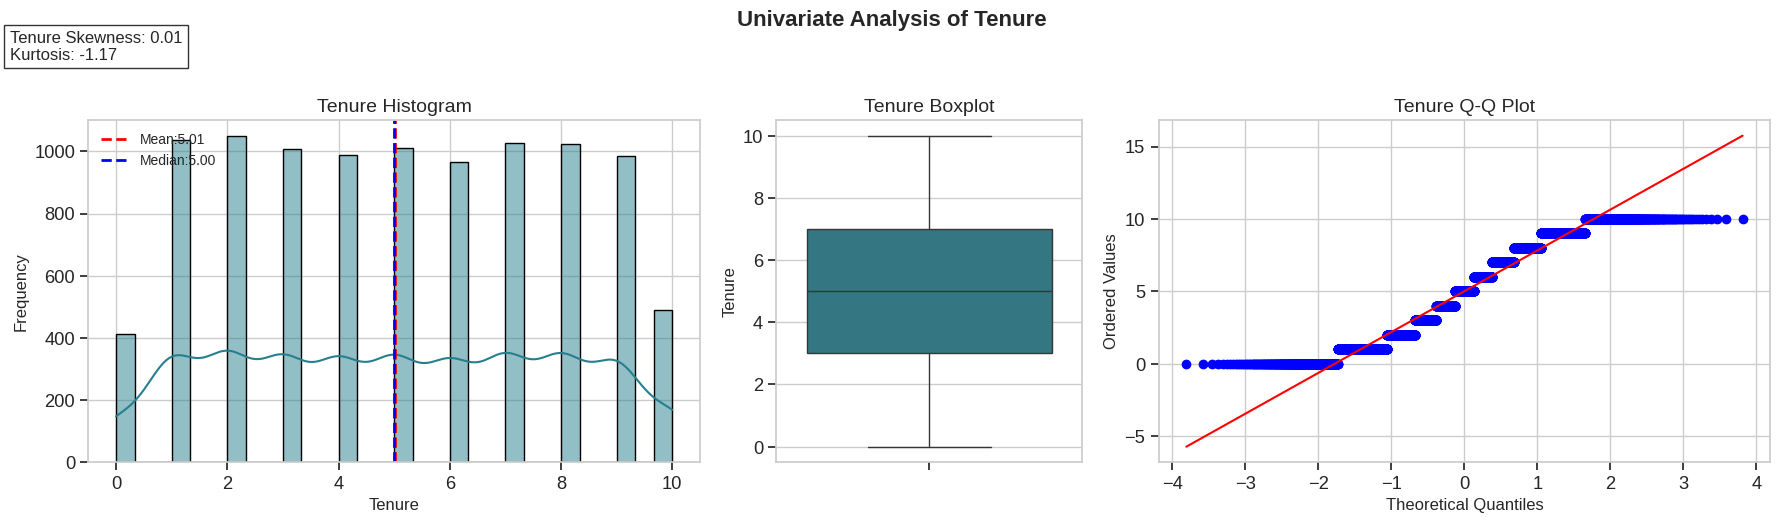

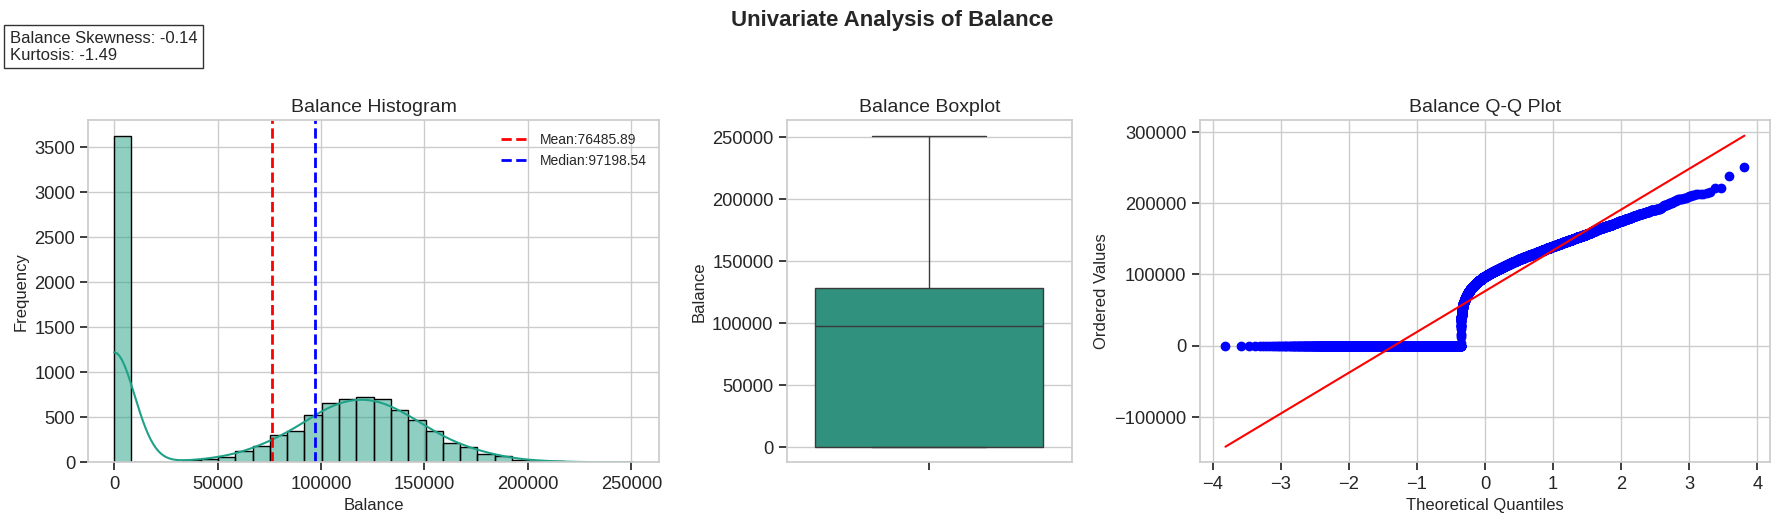

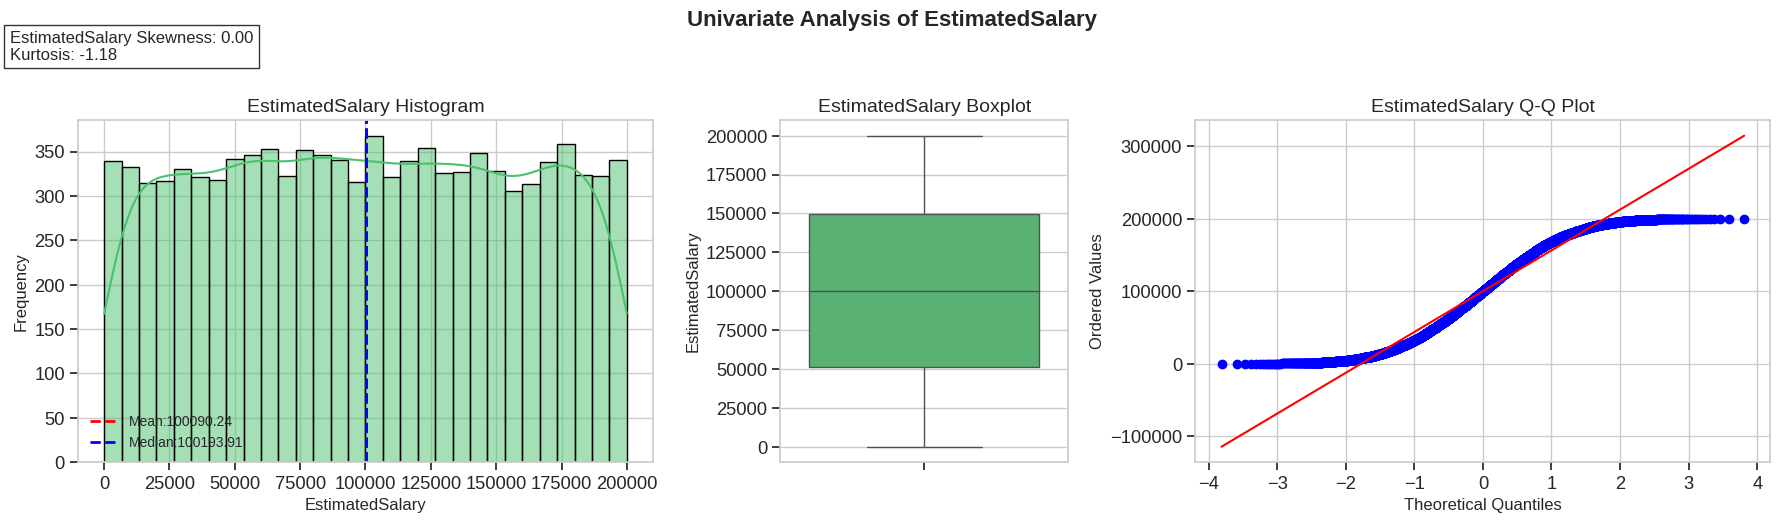

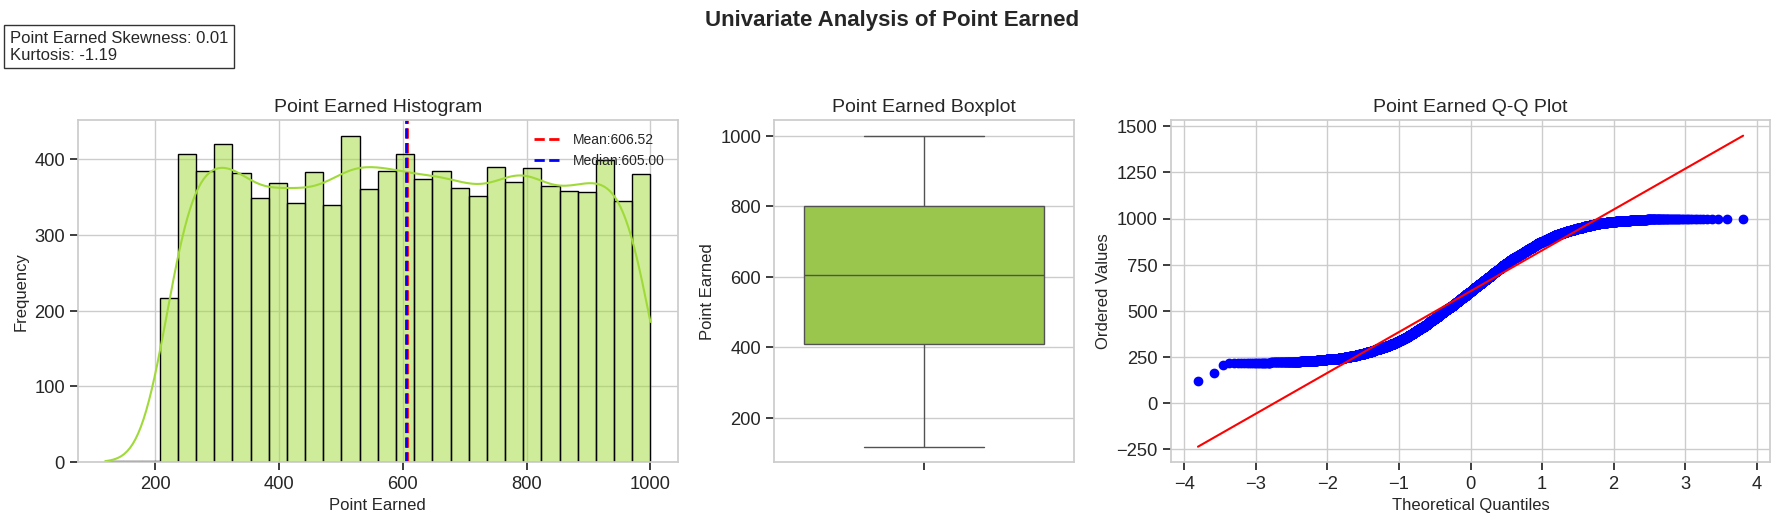

In [ ]:
plot_distributions(data[numerical_cols],sns.color_palette("viridis",len(numerical_cols)))

In [ ]:
#Checking the outlier

def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    if not outliers.empty:
        print(f"Outliers found in '{column}' using IQR method:")
        print(outliers)
    else:
        print(f"No outliers found in '{column}' using IQR method.")

In [ ]:
# Check for outliers in numerical columns
for col in numerical_cols:
  find_outliers_iqr(data, col)

Outliers found in 'CreditScore' using IQR method:
      CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
7             376   Germany  Female   29       4  115046.74              4   
942           376    France  Female   46       6       0.00              1   
1193          363     Spain  Female   28       6  146098.43              3   
1405          359    France  Female   44       6  128747.69              1   
1631          350     Spain    Male   54       1  152677.48              1   
1838          350   Germany    Male   39       0  109733.20              2   
1962          358     Spain  Female   52       8  143542.36              3   
2473          351   Germany  Female   57       4  163146.46              1   
2579          365   Germany    Male   30       0  127760.07              1   
8154          367     Spain    Male   42       6   93608.28              1   
8723          350    France    Male   51      10       0.00              1   
8762          

#### CATEGORIGAL VARIABLE

A **categorical variable** (also known as a qualitative variable) is a type of data variable that represents categories or groups. The values of these variables are labels that assign observations to distinct, non-overlapping groups based on a characteristic or quality. Unlike numerical variables, you cannot perform mathematical operations on categorical variables.

Analyzing categorical data requires different statistical and visualization methods than those used for numerical data. But in the univariate analysis, we focused on **descriptive statistics**.

* **Frequency Distributions**: A count of how often each category appears.
  * Mode: The most frequent category.
* **Visualizations**:
  * Bar charts: Display the frequency or proportion of each category.
  * Pie charts: Show the proportion of each category as a slice of a pie

In [ ]:
# visualization of categorical data
def plot_categorical_features(data):
  categorical_cols=data.columns.to_list()
  plt.style.use('seaborn-v0_8')
  custom_palette = sns.color_palette("crest")

  for i, col in enumerate(categorical_cols):
     labels=data[col].value_counts().keys()
     counts=data[col].value_counts().values
     percentages=[f'{count} ({(count/len(data)*100):.1f}%)' for count in counts]

     plt.figure(figsize=(5,5))

     #pie chart
     plt.pie(counts, labels=percentages, autopct='%1.1f%%', colors=custom_palette)
     plt.title(f'Distribution of {col}', fontsize=14, pad=20)
     plt.axis('equal')
     plt.tight_layout()
     plt.show()

     #table
     value_counts=data[col].value_counts()
     relative_freq=(data[col].value_counts(normalize=True)*100).round(1)
     table_data = pd.DataFrame({
         'Value':value_counts.index,
         'Count':value_counts.values,
         'Percentage':relative_freq.values
     })
     print(tabulate(table_data, headers='keys',tablefmt='psql', showindex=False))
     print("\n")

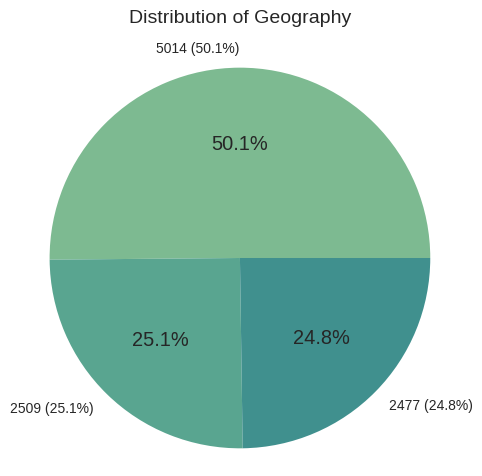

+---------+---------+--------------+
| Value   |   Count |   Percentage |
|---------+---------+--------------|
| France  |    5014 |         50.1 |
| Germany |    2509 |         25.1 |
| Spain   |    2477 |         24.8 |
+---------+---------+--------------+




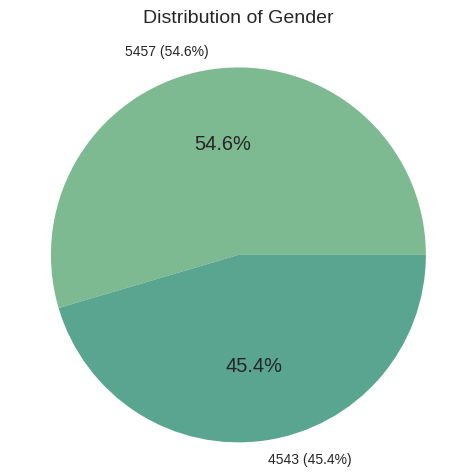

+---------+---------+--------------+
| Value   |   Count |   Percentage |
|---------+---------+--------------|
| Male    |    5457 |         54.6 |
| Female  |    4543 |         45.4 |
+---------+---------+--------------+




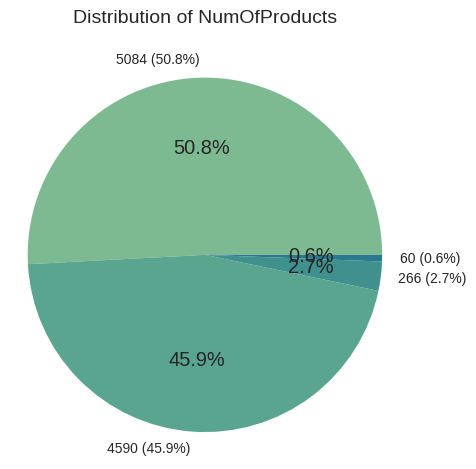

+---------+---------+--------------+
|   Value |   Count |   Percentage |
|---------+---------+--------------|
|       1 |    5084 |         50.8 |
|       2 |    4590 |         45.9 |
|       3 |     266 |          2.7 |
|       4 |      60 |          0.6 |
+---------+---------+--------------+




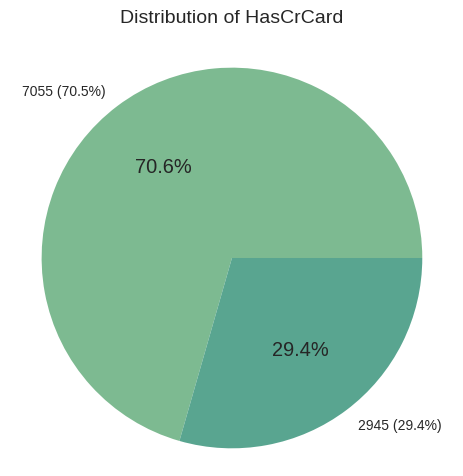

+---------+---------+--------------+
|   Value |   Count |   Percentage |
|---------+---------+--------------|
|       1 |    7055 |         70.6 |
|       0 |    2945 |         29.4 |
+---------+---------+--------------+




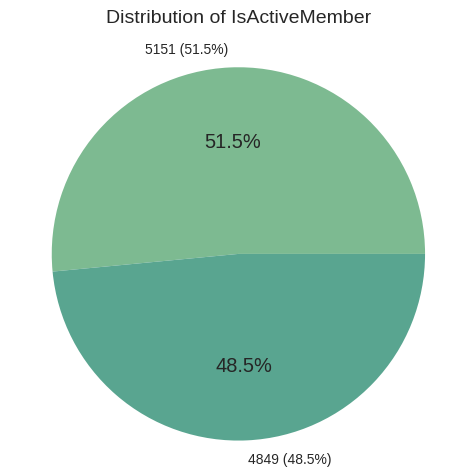

+---------+---------+--------------+
|   Value |   Count |   Percentage |
|---------+---------+--------------|
|       1 |    5151 |         51.5 |
|       0 |    4849 |         48.5 |
+---------+---------+--------------+




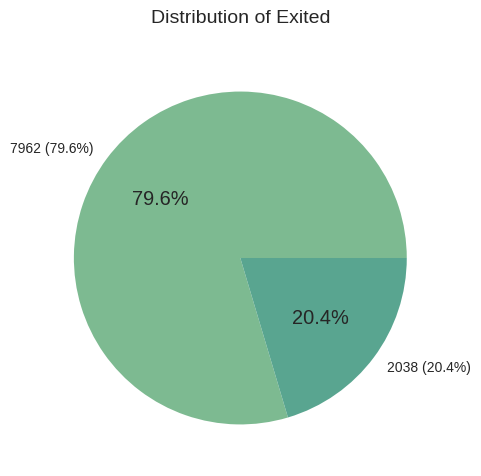

+---------+---------+--------------+
|   Value |   Count |   Percentage |
|---------+---------+--------------|
|       0 |    7962 |         79.6 |
|       1 |    2038 |         20.4 |
+---------+---------+--------------+




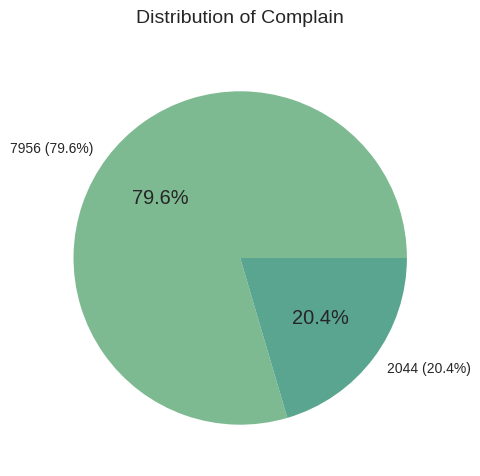

+---------+---------+--------------+
|   Value |   Count |   Percentage |
|---------+---------+--------------|
|       0 |    7956 |         79.6 |
|       1 |    2044 |         20.4 |
+---------+---------+--------------+




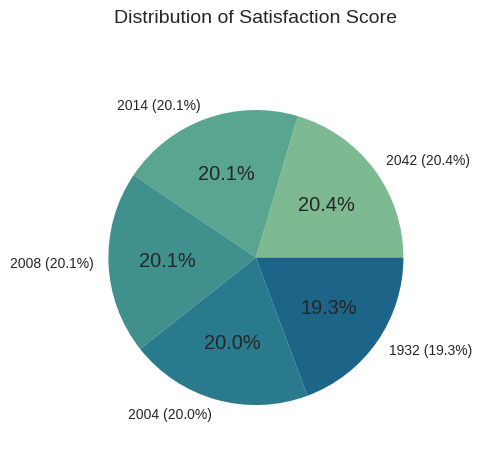

+---------+---------+--------------+
|   Value |   Count |   Percentage |
|---------+---------+--------------|
|       3 |    2042 |         20.4 |
|       2 |    2014 |         20.1 |
|       4 |    2008 |         20.1 |
|       5 |    2004 |         20   |
|       1 |    1932 |         19.3 |
+---------+---------+--------------+




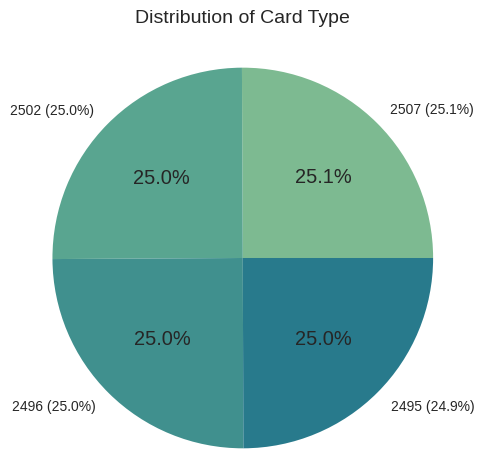

+----------+---------+--------------+
| Value    |   Count |   Percentage |
|----------+---------+--------------|
| DIAMOND  |    2507 |         25.1 |
| GOLD     |    2502 |         25   |
| SILVER   |    2496 |         25   |
| PLATINUM |    2495 |         25   |
+----------+---------+--------------+




In [ ]:
plot_categorical_features(data[categorical_cols])

### 2. BIVARIATE ANALYSIS

The purpose of bivariate analysis is to explore the relationship between two variables.
* **Correlation Analysis**: For two numerical variables, you can calculate the correlation coefficient to measure the strength and direction of their linear relationship.
* **Visualizations**: Plots and bar chart are essential for understanding relationships.


#### DATA VISUALIZATION (1)

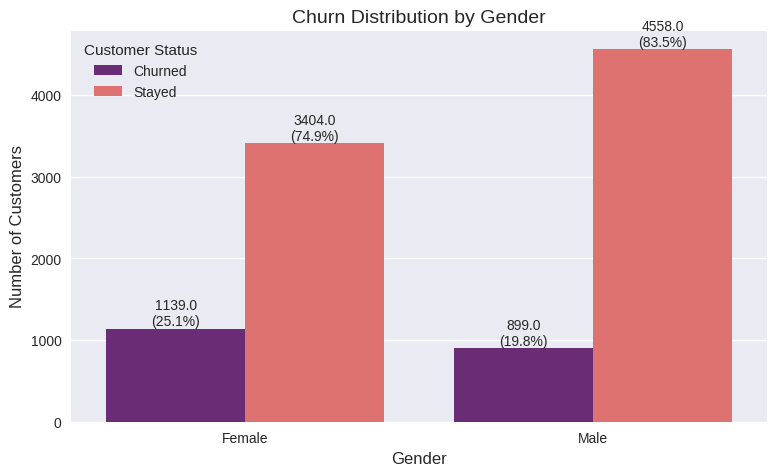

In [ ]:
# Exited vs Gender

# Create readable churn label
data['Exited_Label'] = data['Exited'].map({0: 'Stayed', 1: 'Churned'})

# Calculate total per gender for percentage calculation
total_by_gender = data.groupby('Gender')['Exited'].count().to_dict()

# Plot
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=data, x='Gender', hue='Exited_Label', palette="magma")

# Title and labels
plt.title("Churn Distribution by Gender", fontsize=14)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.legend(title="Customer Status", fontsize=10, title_fontsize=11)

# Add count and percentage on top of bars
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        x = bar.get_x() + bar.get_width() / 2
        gender = ax.get_xticklabels()[int(x)].get_text()
        percentage = (height / total_by_gender[gender]) * 100
        label = f"{height}\n({percentage:.1f}%)"
        ax.annotate(label, (x, height), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

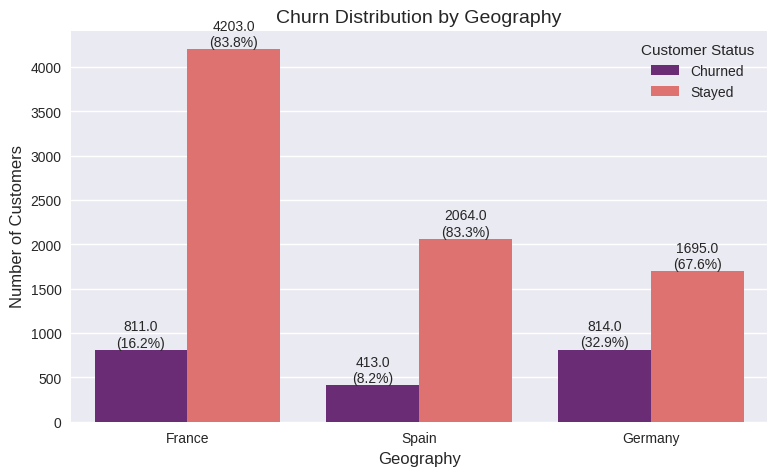

In [ ]:
# Exited vs Geography

# Create readable churn label
data['Exited_Label'] = data['Exited'].map({0: 'Stayed', 1: 'Churned'})

# Calculate total per geography for percentage calculation
total_by_geo = data.groupby('Geography')['Exited'].count().to_dict()

# Plot
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=data, x='Geography', hue='Exited_Label',palette="magma")

# Title and labels
plt.title("Churn Distribution by Geography", fontsize=14)
plt.xlabel("Geography", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.legend(title="Customer Status", fontsize=10, title_fontsize=11)

# Add count and percentage on top of bars
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        x = bar.get_x() + bar.get_width() / 2
        geo = ax.get_xticklabels()[int(x)].get_text()
        percentage = (height / total_by_geo[geo]) * 100
        label = f"{height}\n({percentage:.1f}%)"
        ax.annotate(label, (x, height), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

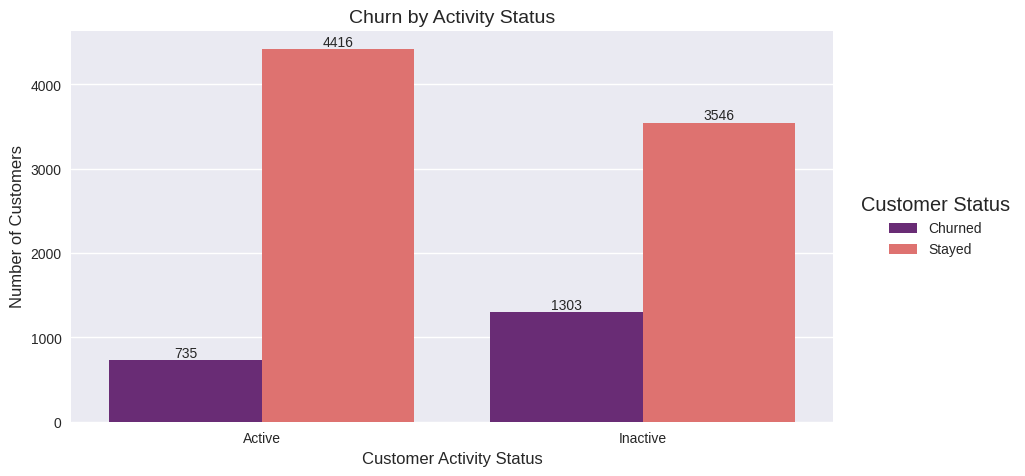

In [ ]:
# Exited vs IsActiveMember

# Map churn and activity labels for readability
data['Exited_Label'] = data['Exited'].map({0: 'Stayed', 1: 'Churned'})
data['Activity_Label'] = data['IsActiveMember'].map({0: 'Inactive', 1: 'Active'})

# Create figure and axis for the plot
plt.figure(figsize=(10.5, 5))
ax = sns.countplot(data=data,x='Activity_Label',hue='Exited_Label',palette="magma")

# Set titles and labels
plt.title("Churn by Activity Status", fontsize=14)
plt.xlabel("Customer Activity Status", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)

# Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

# Move the legend to the right side
ax.legend(title="Customer Status", bbox_to_anchor=(1.02, 0.5), loc='center left')

# Adjust layout
plt.tight_layout()
plt.show()

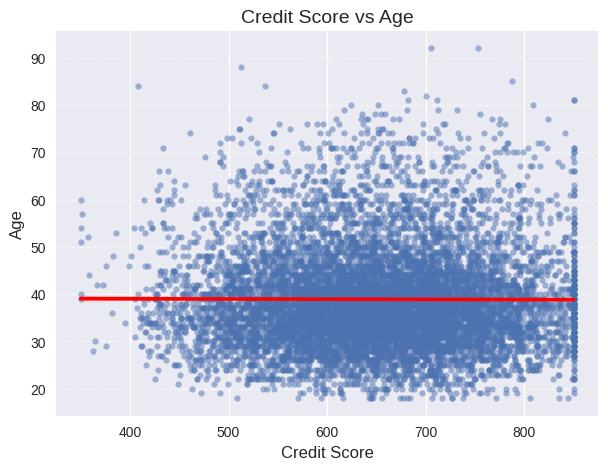

Pearson Correlation: -0.0040, p-value:0.6918


In [ ]:
# CreditScore vs Age
plt.figure(figsize=(7,5))
sns.regplot(data=data, x='CreditScore',y='Age',
            scatter_kws={'alpha':0.5, 's':20},
            line_kws={'color':'red'})
plt.title('Credit Score vs Age', fontsize=14)
plt.xlabel('Credit Score', fontsize=12)
plt.ylabel('Age', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.5)
sns.despine()
plt.show()

# Pearson Correlation value between CreditScore and Age
from scipy.stats import pearsonr
correlation, p_value = pearsonr(data['CreditScore'], data['Age'])
print(f'Pearson Correlation: {correlation:.4f}, p-value:{p_value:.4f}')

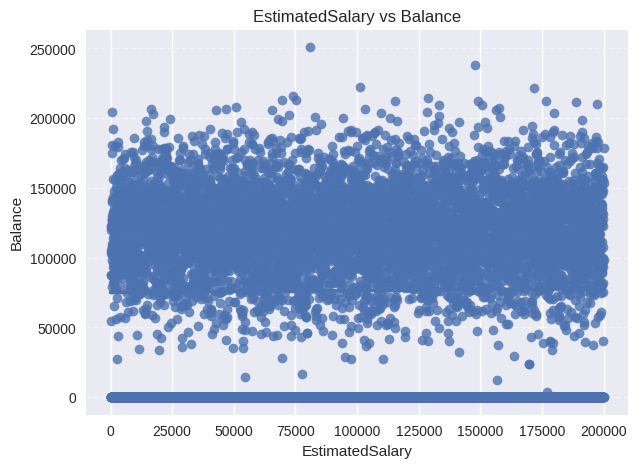

Pearson Correlation: 0.0128, p-value:0.2007


In [ ]:
# estimatedsalary vs balance
plt.figure(figsize=(7,5))
sns.regplot(data=data, x='EstimatedSalary', y='Balance')
plt.title('EstimatedSalary vs Balance')
plt.xlabel('EstimatedSalary')
plt.ylabel('Balance')

plt.grid(axis='y', linestyle='--', alpha=0.5)
sns.despine()
plt.show()

# Pearson Correlation value between EstimatedSalary and Balance
correlation, p_value = pearsonr(data['EstimatedSalary'], data['Balance'])
print(f'Pearson Correlation: {correlation:.4f}, p-value:{p_value:.4f}')

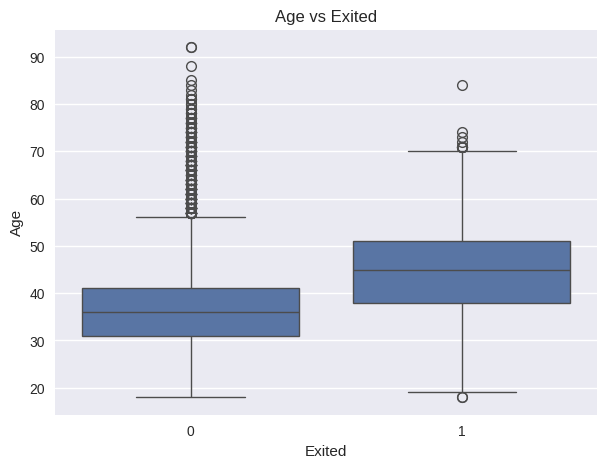

Mann-Whitney U Statistic:4347741.0000, p-value:0.0000


In [ ]:
# age vs exited
plt.figure(figsize=(7,5))
sns.boxplot(data=data, x='Exited', y='Age')
plt.title('Age vs Exited')
plt.xlabel('Exited')
plt.ylabel('Age')

plt.show()

# Mann-Whitney U Statistic between Age and Exited
from scipy.stats import mannwhitneyu
exited_0=data[data['Exited']==0]['Age']
exited_1=data[data['Exited']==1]['Age']
stat, p_value = mannwhitneyu(exited_0,exited_1)
print(f'Mann-Whitney U Statistic:{stat:.4f}, p-value:{p_value:.4f}')

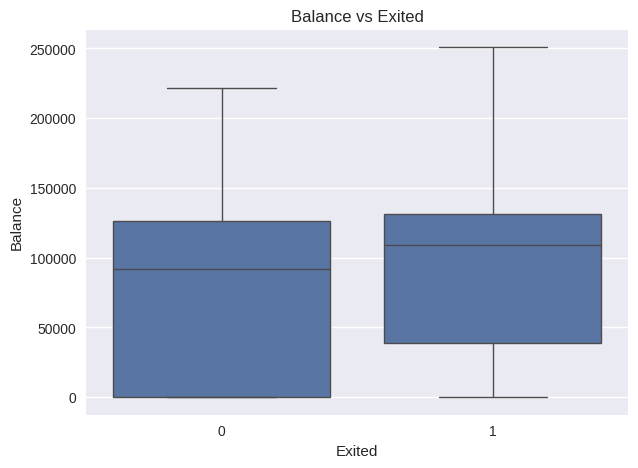

Mann-Whitney U Statistic:4347741.0000, p-value:0.0000


In [ ]:
#balance vs exited
plt.figure(figsize=(7,5))
sns.boxplot(data=data, x='Exited', y='Balance')
plt.title('Balance vs Exited')
plt.xlabel('Exited')
plt.ylabel('Balance')
plt.show()

# Mann-Whitney U Statistic between Balance and Exited
stat, p_value = mannwhitneyu(exited_0, exited_1)
print(f'Mann-Whitney U Statistic:{stat:.4f}, p-value:{p_value:.4f}')

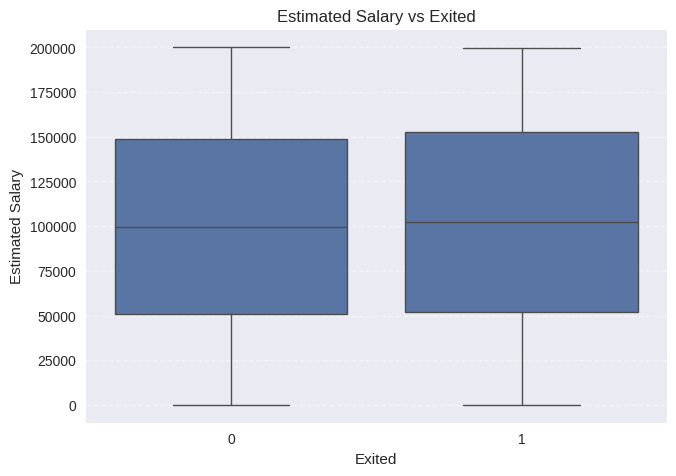

Mann-Whitney U Statistic:7968250.0000, p-value:0.2124


In [ ]:
# estimatedsalary vs exited
plt.figure(figsize=(7,5))
sns.boxplot(data=data, x='Exited', y='EstimatedSalary')
plt.title('Estimated Salary vs Exited')
plt.xlabel('Exited')
plt.ylabel('Estimated Salary')

grouped=data.groupby('Exited')['EstimatedSalary']
for i, group in enumerate(grouped):
  label = group[0]
  median = group[1].median()
  count = group[1].count()
  ax.text(i, median + 2,f"n={count}\nmed={median:.1f}",
  horizontalalignment='center', fontsize=10)
  plt.grid(axis='y', linestyle='--', alpha=0.5)
  sns.despine()

plt.tight_layout()
plt.show()

# Mann-Whitner U Statistic between EstimatedSalary and Exited
exited_0=data[data['Exited']==0]['EstimatedSalary']
exited_1=data[data['Exited']==1]['EstimatedSalary']

stat, p_value = mannwhitneyu(exited_0, exited_1)
print(f'Mann-Whitney U Statistic:{stat:.4f}, p-value:{p_value:.4f}')

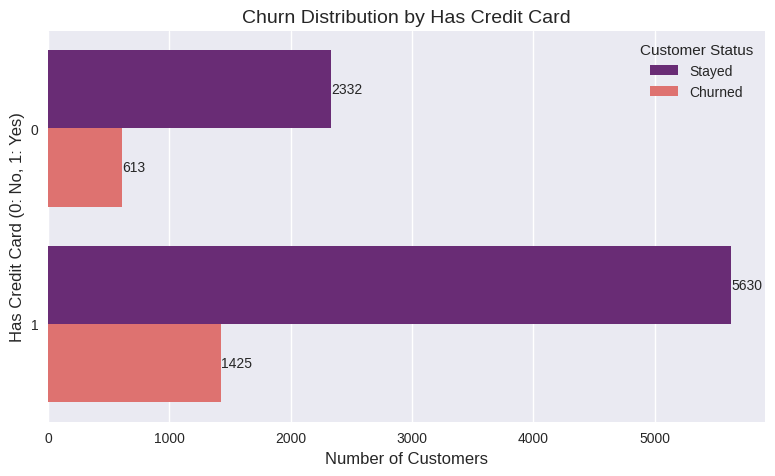

In [ ]:
# hascrcard vs exited (horizontal bar chart)

# Map churn label for readability (if not already done)
if 'Exited_Label' not in data.columns:
    data['Exited_Label'] = data['Exited'].map({0: 'Stayed', 1: 'Churned'})

plt.figure(figsize=(8, 5))
ax = sns.countplot(data=data, y='HasCrCard', hue='Exited_Label', palette="magma")

# Title and labels
plt.title("Churn Distribution by Has Credit Card", fontsize=14)
plt.xlabel("Number of Customers", fontsize=12)
plt.ylabel("Has Credit Card (0: No, 1: Yes)", fontsize=12)
plt.legend(title="Customer Status", fontsize=10, title_fontsize=11)

# Add count on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

plt.tight_layout()
plt.show()

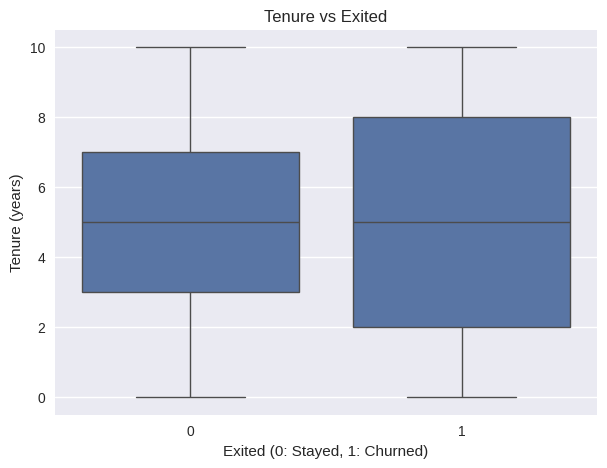

Mann-Whitney U Statistic: 8271000.0000, p-value: 0.1730


In [ ]:
# tenure vs exited
plt.figure(figsize=(7,5))
sns.boxplot(data=data, x='Exited', y='Tenure')
plt.title('Tenure vs Exited')
plt.xlabel('Exited (0: Stayed, 1: Churned)')
plt.ylabel('Tenure (years)')
plt.show()

# Perform Mann-Whitney U test to compare tenure between exited and non-exited groups
from scipy.stats import mannwhitneyu
exited_0 = data[data['Exited']==0]['Tenure']
exited_1 = data[data['Exited']==1]['Tenure']
stat, p_value = mannwhitneyu(exited_0, exited_1)
print(f'Mann-Whitney U Statistic: {stat:.4f}, p-value: {p_value:.4f}')

### MULTIVARIATE ANALYSIS

These involve looking at the relationships among three or more variables simultaneously.

* **Correlation Matrix and Heatmaps**: A correlation matrix displays the correlation coefficients for all pairs of numerical variables, which can then be visualized as a heatmap for quick interpretation.
* **Pair Plots**: These plots create a grid of scatter plots for every pair of numerical variables in a dataset, allowing you to see all the bivariate relationships at once.

#### CORRELATION AND COVARIANCE MATRIX

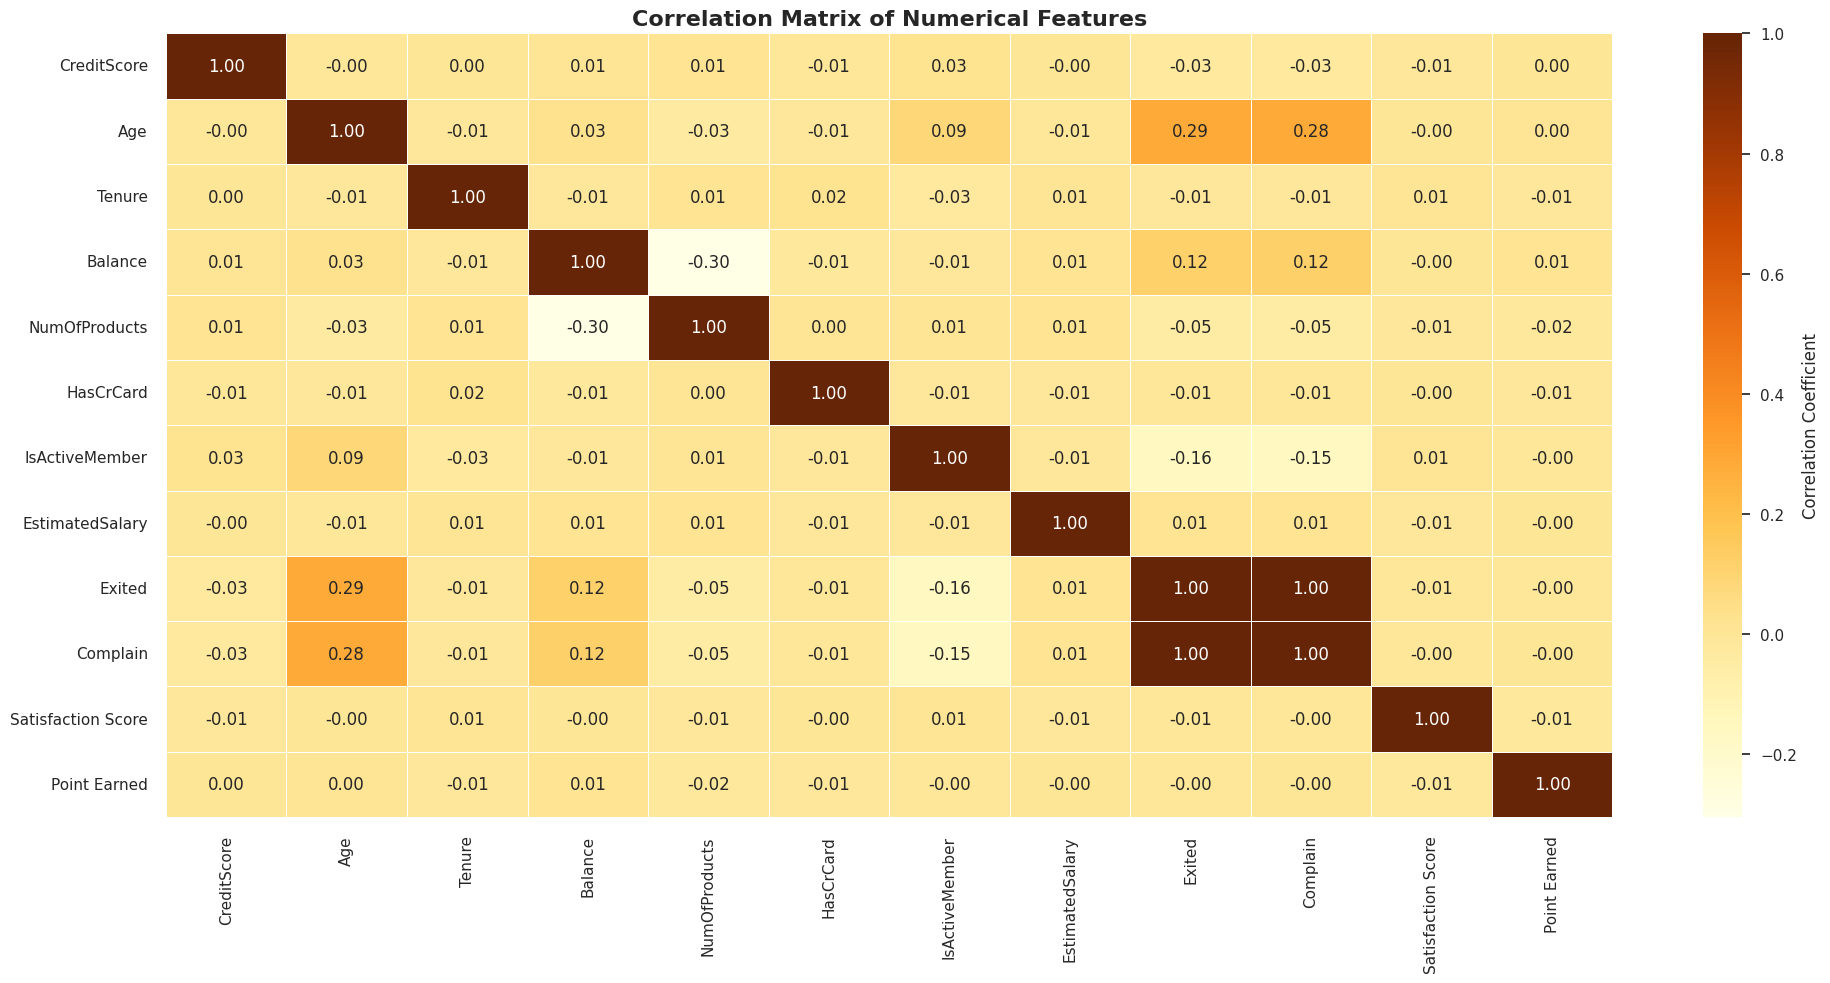

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
CreditScore,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tenure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Balance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumOfProducts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HasCrCard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IsActiveMember,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EstimatedSalary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Exited,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.995693,NaN,NaN
Complain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.995693,NaN,NaN,NaN


In [ ]:
# Correlation
# regrouping where the numerical data based on the data type
num_cols = data.select_dtypes(include=['int64', 'float64']).columns

#caluculate pearson correlation matrix
corr_matrix = data[num_cols].corr()

#set visualization type
sns.set(style="white")

#plot heatmap
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="YlOrBr", linewidths=0.5,
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Correlation Matrix of Numerical Features", fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

#filter correlation matrix for strong correlations (> 0.7 or < 0.7)
strong_corr = corr_matrix[((corr_matrix > 0.7)|(corr_matrix < -0.7)) &
                          (corr_matrix!=1.0)]
display(strong_corr)

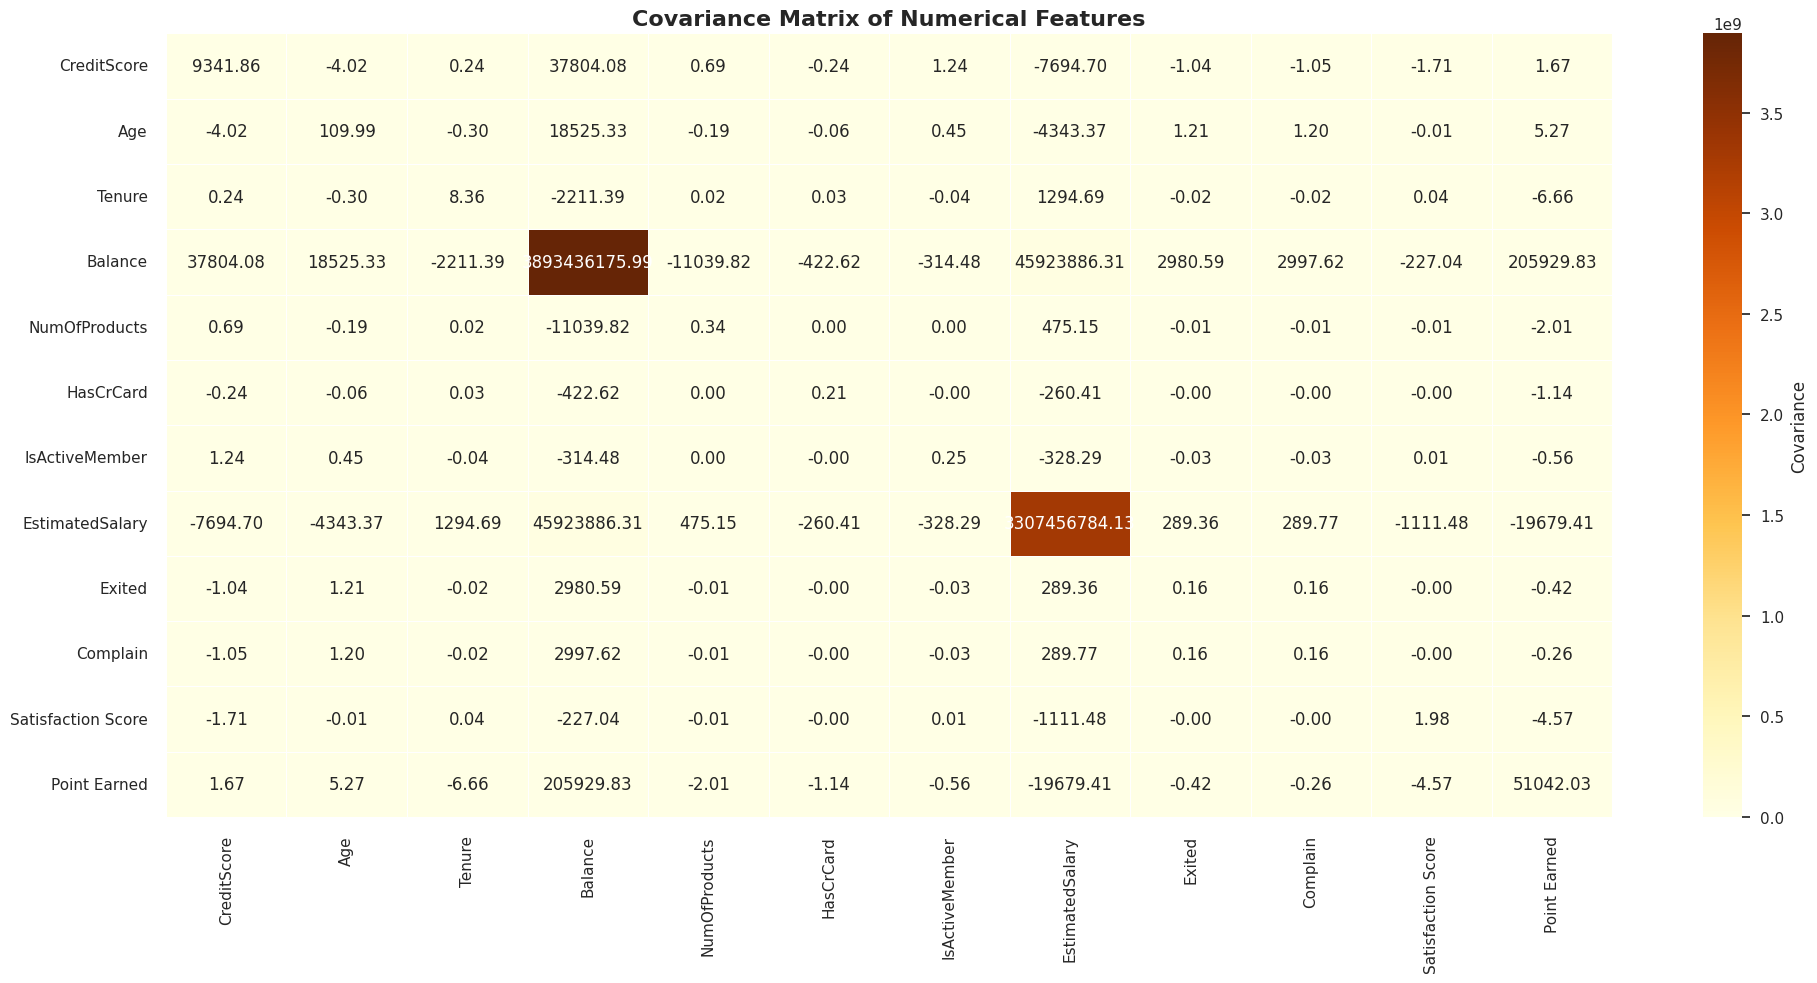

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
CreditScore,9341.860157,-4.019150,0.235355,3.780408e+04,0.687999,-0.240492,1.239139,-7.694701e+03,-1.042374,-1.054292,-1.712069,1.673983
Age,-4.019150,109.994084,-0.303229,1.852533e+04,-0.187157,-0.056036,0.448026,-4.343373e+03,1.205358,1.199204,-0.012922,5.265907
Tenure,0.235355,-0.303229,8.364673,-2.211395e+03,0.022616,0.029773,-0.040997,1.294687e+03,-0.015910,-0.015218,0.035227,-6.662159
Balance,37804.076998,18525.333354,-2211.394696,3.893436e+09,-11039.815064,-422.619801,-314.483074,4.592389e+07,2980.585032,2997.618030,-227.040448,205929.834740
NumOfProducts,0.687999,-0.187157,0.022616,-1.103982e+04,0.338322,0.000844,0.002794,4.751478e+02,-0.011156,-0.010874,-0.009318,-2.014507
HasCrCard,-0.240492,-0.056036,0.029773,-4.226198e+02,0.000844,0.207791,-0.002703,-2.604105e+02,-0.001281,-0.001304,-0.000136,-1.137017
IsActiveMember,1.239139,0.448026,-0.040997,-3.144831e+02,0.002794,-0.002703,0.249797,-3.282927e+02,-0.031481,-0.031190,0.007192,-0.562684
EstimatedSalary,-7694.701048,-4343.372926,1294.686597,4.592389e+07,475.147781,-260.410522,-328.292660,3.307457e+09,289.357458,289.771881,-1111.484599,-19679.410664
Exited,-1.042374,1.205358,-0.015910,2.980585e+03,-0.011156,-0.001281,-0.031481,2.893575e+02,0.162282,0.161759,-0.003313,-0.421220
Complain,-1.054292,1.199204,-0.015218,2.997618e+03,-0.010874,-0.001304,-0.031190,2.897719e+02,0.161759,0.162637,-0.002721,-0.263613


In [ ]:
#Covariance
# regrouping where the numerical data based on the data type
num_cols = data.select_dtypes(include=['int64', 'float64']).columns

# calculate covariance matrix
cov_matrix = data[num_cols].cov()

# set visualization type
sns.set(style="white")

# plot heatmap
plt.figure(figsize=(20,10))
sns.heatmap(cov_matrix, annot=True, fmt=".2f", cmap="YlOrBr", linewidths=0.5,
            cbar_kws={'label': 'Covariance'})
plt.title("Covariance Matrix of Numerical Features", fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

# display the covariance matrix
display(cov_matrix)

#### DATA VISUALIZATION (2)

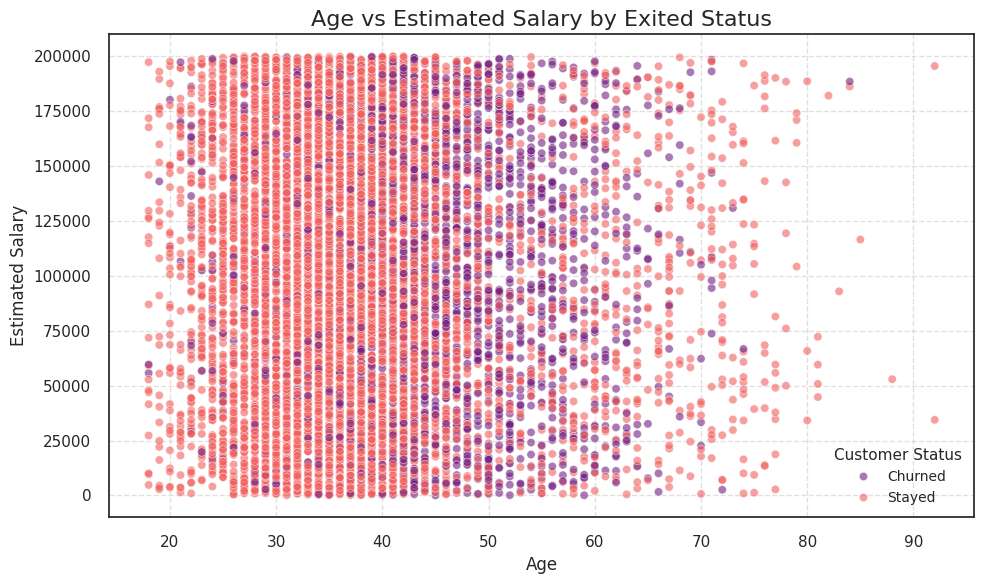

In [ ]:
# Relationship between Age, Estimated Salary, and Exited

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Age', y='EstimatedSalary', hue='Exited_Label', alpha=0.6, palette="magma")

# Title and labels
plt.title('Age vs Estimated Salary by Exited Status', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Estimated Salary', fontsize=12)
plt.legend(title='Customer Status', fontsize=10, title_fontsize=11)

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

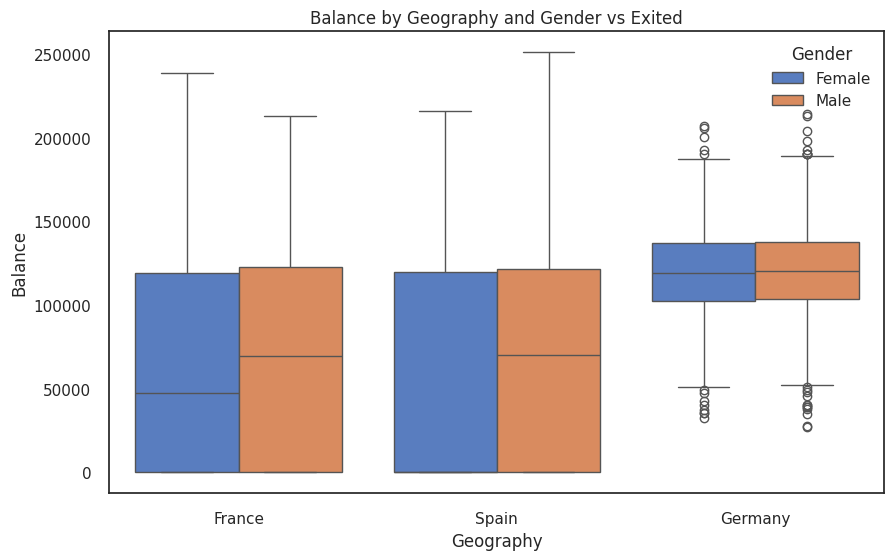

Mann-Whitney U Statistic:8271000.0000, p-value:0.1730


In [ ]:
# Relationship between Balance, Geography and Gender affect Exited
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Geography', y='Balance', hue='Gender', palette='muted')
plt.title('Balance by Geography and Gender vs Exited')
plt.show()

# Chi-Squared Statistic
contigency_table= pd.crosstab(index=[data['Geography'], data['Gender']], columns=data['Exited'])
from scipy.stats import chi2_contingency
stat, p_value = mannwhitneyu(exited_0, exited_1)
print(f'Mann-Whitney U Statistic:{stat:.4f}, p-value:{p_value:.4f}')

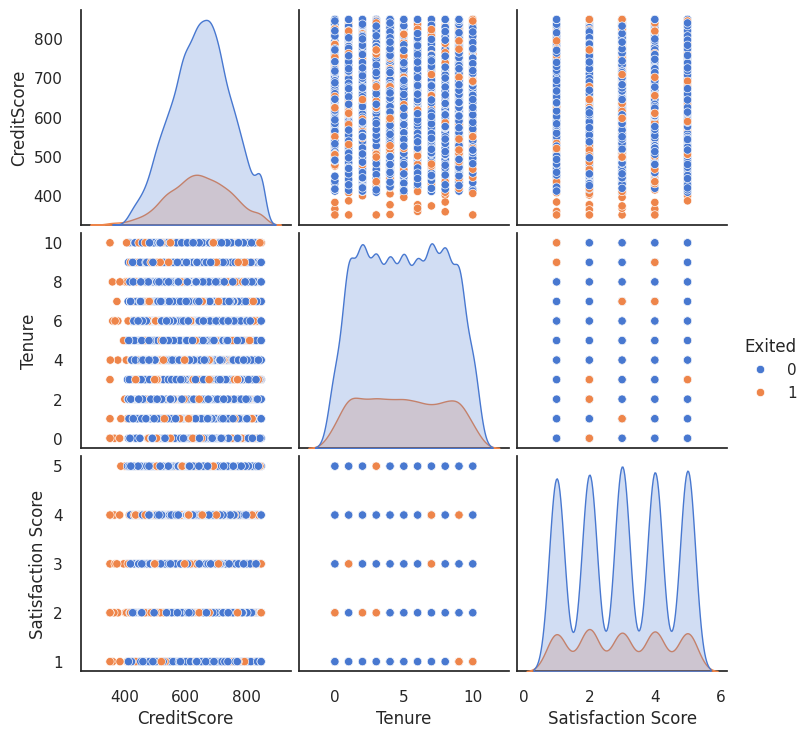

In [ ]:
#how do creditscore, tenure and satisfaction score interact to predict exited?
sns.pairplot(data[['CreditScore', 'Tenure','Satisfaction Score', 'Exited']],
             hue='Exited', palette='muted')
plt.show()

### EDA (3): OTHER DATA VISUALIZATION

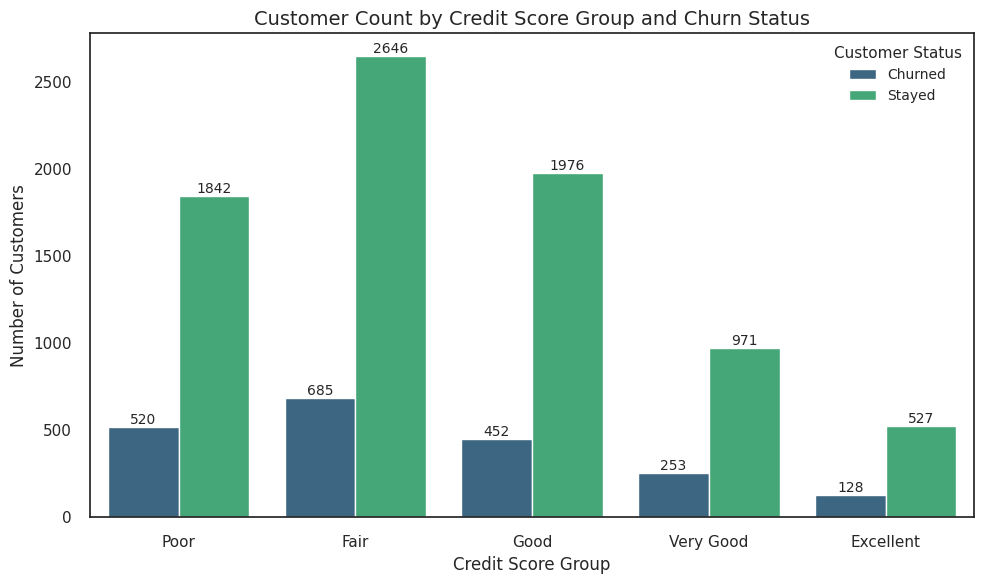

In [ ]:
# churn by credit score group - detailed counts
  # Exceptional/Excellent: 800 - 850
  # Very Good: 740 - 799
  # Good: 670 - 739
  # Fair: 580 - 669
  # Poor: 300 - 579

# Define the credit score bins and labels (if not already defined)
bins = [0, 579, 669, 739, 799, 850]
labels = ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent']

# Create a new column 'CreditScoreGroup' based on the bins (if not already created)
if 'CreditScoreGroup' not in data.columns:
  data['CreditScoreGroup'] = pd.cut(data['CreditScore'], bins=bins, labels=labels, right=True, include_lowest=True)

# Create readable churn label (if not already done)
if 'Exited_Label' not in data.columns:
    data['Exited_Label'] = data['Exited'].map({0: 'Stayed', 1: 'Churned'})

# Plot the counts of churned and stayed customers by credit score group
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data, x='CreditScoreGroup', hue='Exited_Label', palette='viridis')

# Add counts on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

plt.title('Customer Count by Credit Score Group and Churn Status', fontsize=14)
plt.xlabel('Credit Score Group', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.legend(title='Customer Status', fontsize=10, title_fontsize=11)
plt.tight_layout()
plt.show()

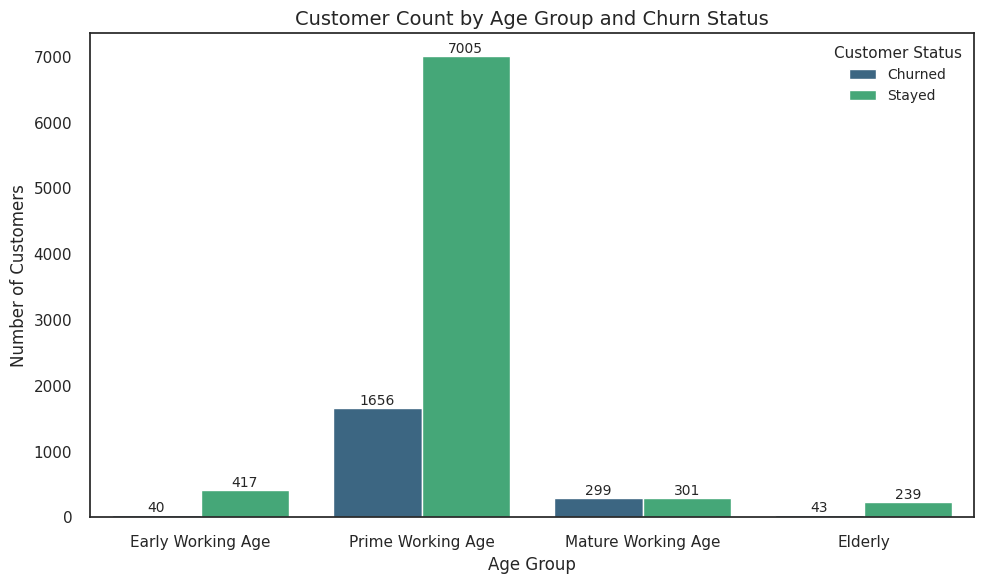

In [ ]:
# churn by age group
 # Age group by https://www.indexmundi.com/united_states/age_structure.html
 # Early Working Age = 15-24 years
 # Prime Working Age = 25-54 years
 # Mature Working Age = 55-64 years
 # Elderly 64+ years

# Define the age bins and labels
bins = [15, 24, 54, 64, data['Age'].max()] # Using data['Age'].max() to include the maximum age
labels = ['Early Working Age', 'Prime Working Age', 'Mature Working Age', 'Elderly']

# Create a new column 'AgeGroup' based on the bins
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, right=True, include_lowest=True)

# Create readable churn label (if not already done)
if 'Exited_Label' not in data.columns:
    data['Exited_Label'] = data['Exited'].map({0: 'Stayed', 1: 'Churned'})

# Plot the counts of churned and stayed customers by age group
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data, x='AgeGroup', hue='Exited_Label', palette='viridis')

# Add counts on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

plt.title('Customer Count by Age Group and Churn Status', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.legend(title='Customer Status', fontsize=10, title_fontsize=11)
plt.tight_layout()
plt.show()

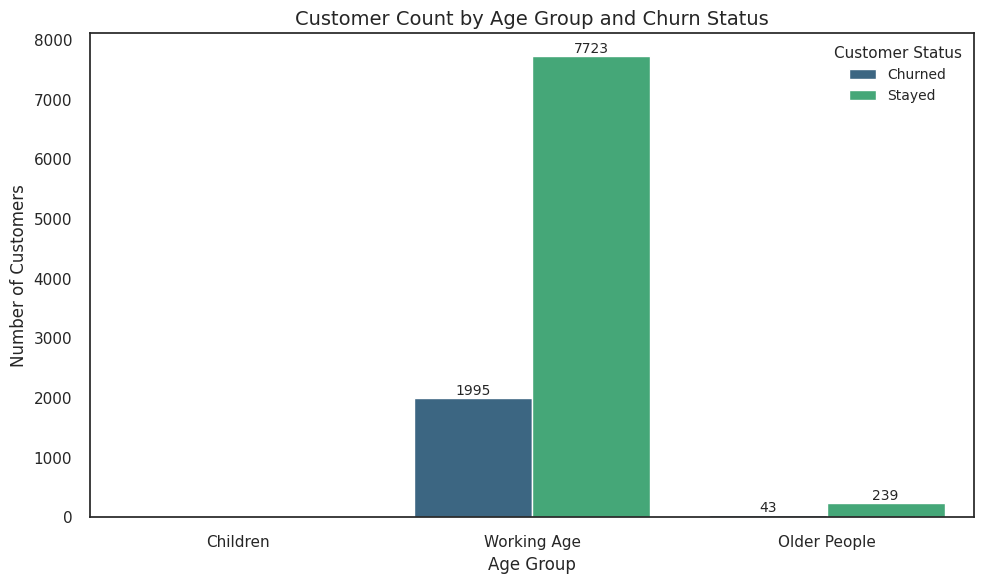

In [ ]:
# churn by age group
 # Age group by https://ec.europa.eu/eurostat/statistics-explained/index.php/Population_structure_and_ageing
 # Children = 0 - 14 years
 # Working Age = 15 - 64years
 # Older People 65+ years

# Define the age bins and labels
bins = [0, 14, 64, data['Age'].max()] # Using data['Age'].max() to include the maximum age
labels = ['Children', 'Working Age', 'Older People']

# Create a new column 'AgeGroup' based on the bins
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, right=True, include_lowest=True)

# Create readable churn label (if not already done)
if 'Exited_Label' not in data.columns:
    data['Exited_Label'] = data['Exited'].map({0: 'Stayed', 1: 'Churned'})

# Plot the counts of churned and stayed customers by age group
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data, x='AgeGroup', hue='Exited_Label', palette='viridis')

# Add counts on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

plt.title('Customer Count by Age Group and Churn Status', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.legend(title='Customer Status', fontsize=10, title_fontsize=11)
plt.tight_layout()
plt.show()

# **DATA PREPROSESSING AND CLEANING**

## FEATURE SELECTION

**Feature selection** in machine learning is the process of selecting the most relevant and informative subset of features (input variables) from an existing dataset for training a model.

**Why is Feature Selection Important?**
* **Improves Model Accuracy**: By removing irrelevant or redundant features, you can reduce noise and improve the model's ability to generalize to new data.
* **Reduces Overfitting**: A model with too many features might "memorize" the training data instead of learning the underlying patterns. Selecting a smaller set of features of the model to focus on the most significant information, which leads to better performance on unseen data.
* **Speeds up Training**: Fewer features mean less data to process, which can significantly reduce the computational cost and training time of a model.
* **Increases Interpretability**: A model with fewer features is easier to understand and explain. It is necessary in fields like finance and healthcare, where model decisions must be transparent.

### MUTUAL INFORMATION SCORES

**Mutual information** measures the dependency between two variables. In this case, it quantifies how much information each numerical feature provides about the 'Exited' variable (whether a customer churned or not).

Here's how to interpret the scores:

* Higher Score: A higher mutual information score indicates a stronger relationship between the feature and the target variable ('Exited'). This means the feature is more informative for predicting churn.
* Lower Score: A lower score suggests a weaker relationship. A score of 0 means the feature and the target are independent.

In [ ]:
# Separate features and target variable
X = data.drop('Exited', axis=1)
y = data['Exited']

# Select only numerical columns for Mutual Information calculation
X_numeric = X.select_dtypes(include=np.number)

# Calculate mutual information scores between numerical features and the target
mutual_info = mutual_info_regression(X_numeric, y)
mutual_info = pd.Series(mutual_info, name="Mutual Info", index=X_numeric.columns)
mutual_info = mutual_info.sort_values(ascending=False)

# Display the mutual information scores
print("Mutual Information Scores:")
display(mutual_info)

Mutual Information Scores:


,Mutual Info
Complain,0.493656
NumOfProducts,0.075658
Age,0.073814
Point Earned,0.010920
Balance,0.008278
Satisfaction Score,0.006186
Tenure,0.005234
IsActiveMember,0.003541
EstimatedSalary,0.002705
CreditScore,0.000395


### CHI-SQUARE TEST

The **Chi-squared test** for independence is used to determine if there is a statistically significant relationship between two categorical variables. In this case, we are testing if each categorical feature is independent of the 'Exited' variable (our target).

* **Chi-squared Statistic**: This is a value calculated from the data that measures the difference between the observed frequencies in your data and the frequencies that would be expected if the two variables were independent. A larger Chi-squared statistic suggests a stronger association between the variables.
* **p-value**: This is the probability of observing a Chi-squared statistic as extreme as, or more extreme than, the one calculated from your data, assuming that the two variables are actually independent (the null hypothesis).

In [ ]:
from scipy.stats import chi2_contingency

# Separate features and target variable
X = data.drop('Exited', axis=1)
y = data['Exited']

# Select only categorical columns, excluding 'Exited' if it's still in the list
if 'Exited' in categorical_cols:
    categorical_cols.remove('Exited')

X_categorical = X[categorical_cols]

# Perform chi-square test for each categorical feature
chi2_results = {}
for col in X_categorical.columns:
    contingency_table = pd.crosstab(X_categorical[col], y)
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    chi2_results[col] = {'Chi-squared Statistic': chi2, 'p-value': p_value}

# Display the chi-square test results
print("Chi-squared Test Results for Categorical Features:")
chi2_df = pd.DataFrame.from_dict(chi2_results, orient='index')
display(chi2_df.sort_values(by='p-value'))

Chi-squared Test Results for Categorical Features:


,Chi-squared Statistic,p-value
NumOfProducts,1501.504831,0.000000e+00
Complain,9907.907036,0.000000e+00
Geography,300.626401,5.245736e-66
IsActiveMember,243.694802,6.153167e-55
Gender,112.396554,2.925368e-26
Card Type,5.053223,1.679411e-01
Satisfaction Score,3.802704,4.333650e-01
HasCrCard,0.449404,5.026182e-01


# **DATA MODELLING**

#### DATA SPLIT : TRAIN AND TEST

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE # Keep SMOTE here as it's part of the overall process context
from imblearn.pipeline import Pipeline as ImbPipeline # Keep ImbPipeline as it's used with SMOTE
from sklearn.pipeline import Pipeline # Keep standard Pipeline as it's used without SMOTE
import numpy as np

# Assuming 'data' DataFrame is already loaded and preprocessed (e.g., irrelevant columns removed)

# --- Data Preparation ---
# Separate features (X) and target (y)
# Exclude 'Complain' column due to data leakage, and other potentially generated columns
X = data.drop(['Exited', 'Complain', 'Exited_Label', 'Activity_Label', 'CreditScoreGroup', 'AgeGroup'], axis=1, errors='ignore') # Use errors='ignore' in case columns are not present
y = data['Exited']

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object', 'category']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

# Create preprocessing pipelines for numerical and categorical features
numerical_transformer_std = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Apply log transformation to 'Age' and 'Balance'
log_transformer = FunctionTransformer(np.log1p, validate=False)

# Create column transformer with log transformation for specified columns
preprocessor = ColumnTransformer(
    transformers=[
        ('log', log_transformer, ['Age', 'Balance']), # Apply log transform to Age and Balance
        ('num', numerical_transformer_std, [col for col in numerical_features if col not in ['Age', 'Balance']]), # Scale other numerical features
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Data splitting and preprocessing setup complete.")
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Data splitting and preprocessing setup complete.
Shape of X_train: (8000, 13)
Shape of X_test: (2000, 13)
Shape of y_train: (8000,)
Shape of y_test: (2000,)


### BACKWARD ELIMINATION

In [ ]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
from sklearn.preprocessing import FunctionTransformer

# Separate features (X) and target (y)
# Exclude 'Complain' column due to data leakage, and other generated columns
X = data.drop(['Exited', 'Complain', 'Exited_Label', 'Activity_Label', 'CreditScoreGroup', 'AgeGroup'], axis=1, errors='ignore')
y = data['Exited']

# Apply log transformation to 'Age' and 'Balance'
log_transformer = FunctionTransformer(np.log1p, validate=False)
X[['Age', 'Balance']] = log_transformer.transform(X[['Age', 'Balance']])


# Identify categorical features for one-hot encoding
categorical_features = X.select_dtypes(include=['object', 'category']).columns

# Apply one-hot encoding to categorical features
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Convert boolean columns to integers (0s and 1s)
for col in X.columns:
    if X[col].dtype == 'bool':
        X[col] = X[col].astype(int)

# Ensure all columns are numeric before adding the constant
for col in X.columns:
    if not pd.api.types.is_numeric_dtype(X[col]):
        print(f"Warning: Column '{col}' is not numeric and will be dropped.")
        X = X.drop(col, axis=1)


# Add a constant term to the feature set for the statsmodels model
X = sm.add_constant(X, has_constant='add')

# Fit the initial logistic regression model with all features
model = sm.Logit(y, X).fit()

# Print the model summary
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.422867
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9983
Method:                           MLE   Df Model:                           16
Date:                Sun, 31 Aug 2025   Pseudo R-squ.:                  0.1637
Time:                        05:33:14   Log-Likelihood:                -4228.7
converged:                       True   LL-Null:                       -5056.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -13.1704      0.508    -25.934      0.000     -14.166     -12.175
Credi

### MACHINE LEARNING (ML)

#### LOGISTIC REGRESSION (WITH SMOTE)

--- Training Logistic Regression with SMOTE ---
ROC AUC: 0.7819

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1592
           1       0.38      0.72      0.50       408

    accuracy                           0.71      2000
   macro avg       0.65      0.71      0.65      2000
weighted avg       0.80      0.71      0.73      2000


Confusion Matrix:
[[1118  474]
 [ 114  294]]


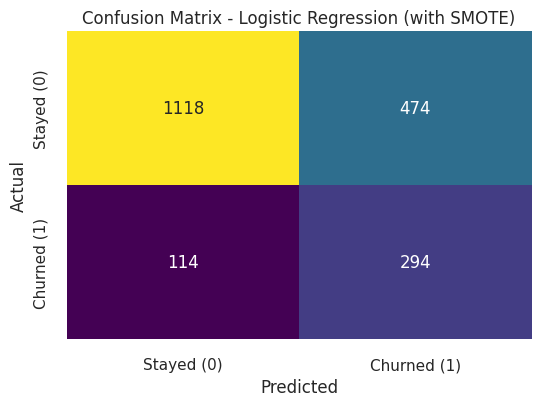

In [ ]:
# --- Logistic Regression Model (with SMOTE) ---
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.pipeline import Pipeline as ImbPipeline # Use ImbPipeline for pipelines with SMOTE

print("--- Training Logistic Regression with SMOTE ---")

# Create a pipeline that includes preprocessing, SMOTE, and the classifier
pipeline_lr_smote = ImbPipeline(steps=[('preprocessor', preprocessor),
                                     ('smote', SMOTE(random_state=42)),
                                     ('classifier', LogisticRegression(random_state=42))])

# Train the model using the original training data
pipeline_lr_smote.fit(X_train, y_train)

# Predict probabilities on the original test set
if hasattr(pipeline_lr_smote, "predict_proba"):
    y_pred_proba_lr_smote = pipeline_lr_smote.predict_proba(X_test)[:, 1]
elif hasattr(pipeline_lr_smote, "decision_function"):
    y_pred_proba_lr_smote = pipeline_lr_smote.decision_function(X_test)
else:
    y_pred_proba_lr_smote = None
    print("Warning: Logistic Regression does not support probability or decision function. Skipping AUC.")

# Calculate ROC AUC and store the result
roc_auc_lr_smote = None
if y_pred_proba_lr_smote is not None:
    try:
        roc_auc_lr_smote = roc_auc_score(y_test, y_pred_proba_lr_smote)
        print(f"ROC AUC: {roc_auc_lr_smote:.4f}")
    except ValueError:
        print("Could not calculate ROC AUC for Logistic Regression. Check test data.")

# Predict class labels on the original test set
y_pred_lr_smote = pipeline_lr_smote.predict(X_test)

# Get classification report and confusion matrix and store the results
class_report_lr_smote = classification_report(y_test, y_pred_lr_smote)
conf_matrix_lr_smote = confusion_matrix(y_test, y_pred_lr_smote)

print("\nClassification Report:")
print(class_report_lr_smote)

print("\nConfusion Matrix:")
print(conf_matrix_lr_smote)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_lr_smote, annot=True, fmt='d', cmap='viridis', cbar=False,
            xticklabels=['Stayed (0)', 'Churned (1)'], yticklabels=['Stayed (0)', 'Churned (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression (with SMOTE)')
plt.show()

# Store results in dictionaries
results_auc_smote = {'Logistic Regression': roc_auc_lr_smote}
results_report_smote = {'Logistic Regression': class_report_lr_smote}
results_auc_no_smote = {} # Initialize empty dictionaries for models without SMOTE
results_report_no_smote = {}

#### DECISION TREE (WITH SMOTE)

--- Training Decision Tree with SMOTE ---
ROC AUC: 0.7063

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1592
           1       0.47      0.58      0.52       408

    accuracy                           0.78      2000
   macro avg       0.68      0.71      0.69      2000
weighted avg       0.80      0.78      0.79      2000


Confusion Matrix:
[[1324  268]
 [ 171  237]]


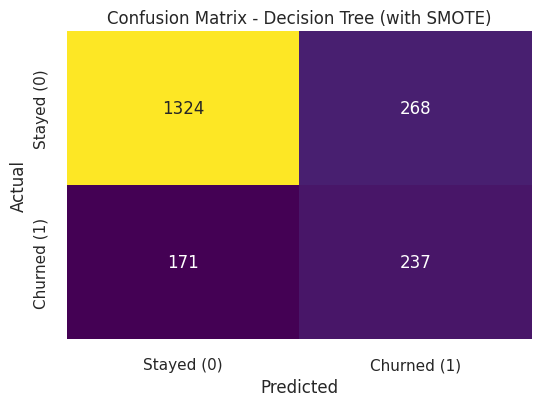

In [ ]:
# --- Decision Tree Model (with SMOTE) ---
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.pipeline import Pipeline as ImbPipeline # Use ImbPipeline for pipelines with SMOTE

print("--- Training Decision Tree with SMOTE ---")

# Create a pipeline that includes preprocessing, SMOTE, and the classifier
pipeline_dt_smote = ImbPipeline(steps=[('preprocessor', preprocessor),
                                     ('smote', SMOTE(random_state=42)),
                                     ('classifier', DecisionTreeClassifier(random_state=42))])

# Train the model using the original training data
pipeline_dt_smote.fit(X_train, y_train)

# Predict probabilities on the original test set
if hasattr(pipeline_dt_smote, "predict_proba"):
    y_pred_proba_dt_smote = pipeline_dt_smote.predict_proba(X_test)[:, 1]
elif hasattr(pipeline_dt_smote, "decision_function"):
    y_pred_proba_dt_smote = pipeline_dt_smote.decision_function(X_test)
else:
    y_pred_proba_dt_smote = None
    print("Warning: Decision Tree does not support probability or decision function. Skipping AUC.")

# Calculate ROC AUC and store the result
roc_auc_dt_smote = None
if y_pred_proba_dt_smote is not None:
    try:
        roc_auc_dt_smote = roc_auc_score(y_test, y_pred_proba_dt_smote)
        print(f"ROC AUC: {roc_auc_dt_smote:.4f}")
    except ValueError:
        print("Could not calculate ROC AUC for Decision Tree. Check test data.")

# Predict class labels on the original test set
y_pred_dt_smote = pipeline_dt_smote.predict(X_test)

# Get classification report and confusion matrix and store the results
class_report_dt_smote = classification_report(y_test, y_pred_dt_smote)
conf_matrix_dt_smote = confusion_matrix(y_test, y_pred_dt_smote)

print("\nClassification Report:")
print(class_report_dt_smote)

print("\nConfusion Matrix:")
print(conf_matrix_dt_smote)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_dt_smote, annot=True, fmt='d', cmap='viridis', cbar=False,
            xticklabels=['Stayed (0)', 'Churned (1)'], yticklabels=['Stayed (0)', 'Churned (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree (with SMOTE)')
plt.show()

# Store results in dictionaries (update existing ones)
results_auc_smote['Decision Tree'] = roc_auc_dt_smote
results_report_smote['Decision Tree'] = class_report_dt_smote

#### RANDOM FOREST (WITH SMOTE)

--- Training Random Forest with SMOTE ---
ROC AUC: 0.8591

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      1592
           1       0.66      0.57      0.61       408

    accuracy                           0.85      2000
   macro avg       0.77      0.75      0.76      2000
weighted avg       0.85      0.85      0.85      2000


Confusion Matrix:
[[1469  123]
 [ 174  234]]


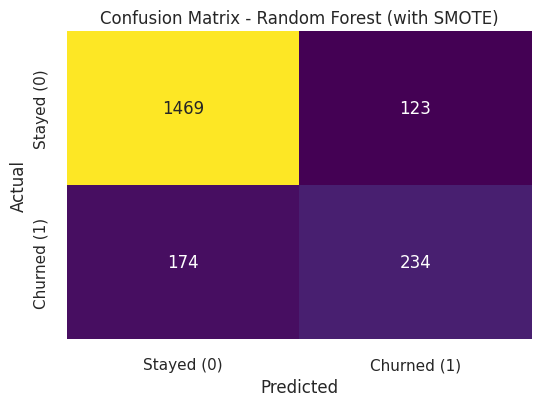

In [ ]:
# --- Random Forest Model (with SMOTE) ---
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.pipeline import Pipeline as ImbPipeline # Use ImbPipeline for pipelines with SMOTE

print("--- Training Random Forest with SMOTE ---")

# Create a pipeline that includes preprocessing, SMOTE, and the classifier
pipeline_rf_smote = ImbPipeline(steps=[('preprocessor', preprocessor),
                                     ('smote', SMOTE(random_state=42)),
                                     ('classifier', RandomForestClassifier(random_state=42))])

# Train the model using the original training data
pipeline_rf_smote.fit(X_train, y_train)

# Predict probabilities on the original test set
if hasattr(pipeline_rf_smote, "predict_proba"):
    y_pred_proba_rf_smote = pipeline_rf_smote.predict_proba(X_test)[:, 1]
elif hasattr(pipeline_rf_smote, "decision_function"):
    y_pred_proba_rf_smote = pipeline_rf_smote.decision_function(X_test)
else:
    y_pred_proba_rf_smote = None
    print("Warning: Random Forest does not support probability or decision function. Skipping AUC.")

# Calculate ROC AUC and store the result
roc_auc_rf_smote = None
if y_pred_proba_rf_smote is not None:
    try:
        roc_auc_rf_smote = roc_auc_score(y_test, y_pred_proba_rf_smote)
        print(f"ROC AUC: {roc_auc_rf_smote:.4f}")
    except ValueError:
        print("Could not calculate ROC AUC for Random Forest. Check test data.")

# Predict class labels on the original test set
y_pred_rf_smote = pipeline_rf_smote.predict(X_test)

# Get classification report and confusion matrix and store the results
class_report_rf_smote = classification_report(y_test, y_pred_rf_smote)
conf_matrix_rf_smote = confusion_matrix(y_test, y_pred_rf_smote)

print("\nClassification Report:")
print(class_report_rf_smote)

print("\nConfusion Matrix:")
print(conf_matrix_rf_smote)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf_smote, annot=True, fmt='d', cmap='viridis', cbar=False,
            xticklabels=['Stayed (0)', 'Churned (1)'], yticklabels=['Stayed (0)', 'Churned (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest (with SMOTE)')
plt.show()

# Store results in dictionaries (update existing ones)
results_auc_smote['Random Forest'] = roc_auc_rf_smote
results_report_smote['Random Forest'] = class_report_rf_smote

#### GRADIENT BOSTING (WITH SMOTE)

--- Training Gradient Boosting with SMOTE ---
ROC AUC: 0.8716

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1592
           1       0.65      0.62      0.64       408

    accuracy                           0.86      2000
   macro avg       0.78      0.77      0.77      2000
weighted avg       0.85      0.86      0.85      2000


Confusion Matrix:
[[1457  135]
 [ 153  255]]


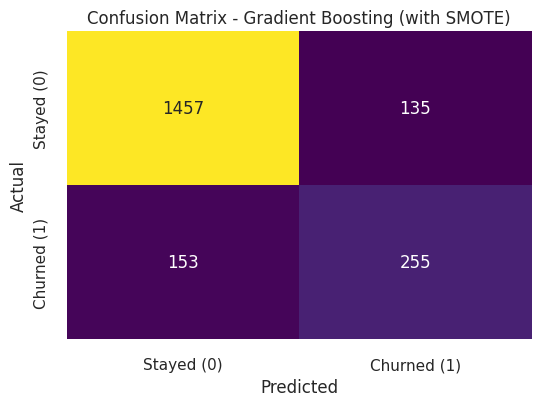

In [ ]:
# --- Gradient Boosting Model (with SMOTE) ---
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.pipeline import Pipeline as ImbPipeline # Use ImbPipeline for pipelines with SMOTE

print("--- Training Gradient Boosting with SMOTE ---")

# Create a pipeline that includes preprocessing, SMOTE, and the classifier
pipeline_gb_smote = ImbPipeline(steps=[('preprocessor', preprocessor),
                                     ('smote', SMOTE(random_state=42)),
                                     ('classifier', GradientBoostingClassifier(random_state=42))])

# Train the model using the original training data
pipeline_gb_smote.fit(X_train, y_train)

# Predict probabilities on the original test set
if hasattr(pipeline_gb_smote, "predict_proba"):
    y_pred_proba_gb_smote = pipeline_gb_smote.predict_proba(X_test)[:, 1]
elif hasattr(pipeline_gb_smote, "decision_function"):
    y_pred_proba_gb_smote = pipeline_gb_smote.decision_function(X_test)
else:
    y_pred_proba_gb_smote = None
    print("Warning: Gradient Boosting does not support probability or decision function. Skipping AUC.")


# Calculate ROC AUC and store the result
roc_auc_gb_smote = None
if y_pred_proba_gb_smote is not None:
    try:
        roc_auc_gb_smote = roc_auc_score(y_test, y_pred_proba_gb_smote)
        print(f"ROC AUC: {roc_auc_gb_smote:.4f}")
    except ValueError:
        print("Could not calculate ROC AUC for Gradient Boosting. Check test data.")

# Predict class labels on the original test set
y_pred_gb_smote = pipeline_gb_smote.predict(X_test)

# Get classification report and confusion matrix and store the results
class_report_gb_smote = classification_report(y_test, y_pred_gb_smote)
conf_matrix_gb_smote = confusion_matrix(y_test, y_pred_gb_smote)

print("\nClassification Report:")
print(class_report_gb_smote)

print("\nConfusion Matrix:")
print(conf_matrix_gb_smote)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_gb_smote, annot=True, fmt='d', cmap='viridis', cbar=False,
            xticklabels=['Stayed (0)', 'Churned (1)'], yticklabels=['Stayed (0)', 'Churned (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Gradient Boosting (with SMOTE)')
plt.show()

# Store results in dictionaries (update existing ones)
results_auc_smote['Gradient Boosting'] = roc_auc_gb_smote
results_report_smote['Gradient Boosting'] = class_report_gb_smote

#### DENSE NEURAL NETWORK/DNN (WITH SMOTE)

--- Training Dense Neural Network with SMOTE ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5628 - auc: 0.5869 - loss: 0.6961 - val_accuracy: 0.7064 - val_auc: 0.7852 - val_loss: 0.5783
Epoch 2/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6726 - auc: 0.7440 - loss: 0.5914 - val_accuracy: 0.7414 - val_auc: 0.8273 - val_loss: 0.5146
Epoch 3/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7127 - auc: 0.7937 - loss: 0.5462 - val_accuracy: 0.7520 - val_auc: 0.8361 - val_loss: 0.4979
Epoch 4/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7315 - auc: 0.8121 - loss: 0.5298 - val_accuracy: 0.7539 - val_auc: 0.8400 - val_loss: 0.4923
Epoch 5/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7300 - auc: 0.8125 - loss: 0.5247 - val_accuracy: 0.7606 - val_auc: 0.8444 - val_loss: 0.4858
Epoch 6/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7630 - auc: 0.8401 - loss: 0.4920 - val_accuracy: 0.7626 - val_auc: 0.8462 - val_loss: 0.4886
Epoch 7/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 

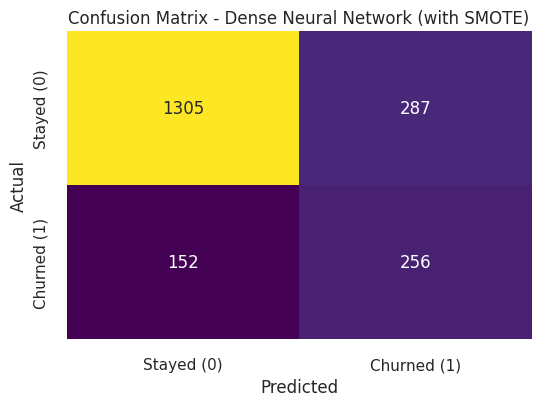

In [ ]:
# --- Dense Neural Network Model (with SMOTE) ---
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split # Import train_test_split

print("--- Training Dense Neural Network with SMOTE ---")

# Define the neural network model
def create_nn_model(input_shape):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(input_shape,)))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid')) # Sigmoid for binary classification

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])
    return model

# Apply preprocessing and SMOTE outside the Keras model training
# Apply preprocessing to the training data
X_train_processed = preprocessor.fit_transform(X_train)

# Apply SMOTE to the preprocessed training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

# Split the resampled training data for validation during training
X_train_resampled_split, X_val_resampled, y_train_resampled_split, y_val_resampled = train_test_split(
    X_train_resampled, y_train_resampled, test_size=0.2, random_state=42, stratify=y_train_resampled
)

# Get the shape of the resampled training data to define the input shape for the NN
input_shape = X_train_resampled_split.shape[1]

# Create the neural network model
nn_model = create_nn_model(input_shape)

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = nn_model.fit(X_train_resampled_split, y_train_resampled_split,
                       epochs=50, # You might need to adjust epochs
                       batch_size=32,
                       validation_data=(X_val_resampled, y_val_resampled),
                       callbacks=[early_stopping],
                       verbose=1)

# Predict probabilities on the original test set
# We need to apply preprocessing to the test set before predicting
X_test_processed = preprocessor.transform(X_test)
y_pred_proba_nn_smote = nn_model.predict(X_test_processed).ravel()


# Calculate ROC AUC and store the result
roc_auc_nn_smote = roc_auc_score(y_test, y_pred_proba_nn_smote)
print(f"ROC AUC: {roc_auc_nn_smote:.4f}")


# Predict class labels on the original test set
# Use a threshold (e.g., 0.5) to convert probabilities to class labels
y_pred_nn_smote = (y_pred_proba_nn_smote > 0.5).astype(int)

# Get classification report and confusion matrix and store the results
class_report_nn_smote = classification_report(y_test, y_pred_nn_smote)
conf_matrix_nn_smote = confusion_matrix(y_test, y_pred_nn_smote)

print("\nClassification Report:")
print(class_report_nn_smote)

print("\nConfusion Matrix:")
print(conf_matrix_nn_smote)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_nn_smote, annot=True, fmt='d', cmap='viridis', cbar=False,
            xticklabels=['Stayed (0)', 'Churned (1)'], yticklabels=['Stayed (0)', 'Churned (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Dense Neural Network (with SMOTE)')
plt.show()

# Store results in dictionaries (update existing ones)
results_auc_smote['Dense Neural Network'] = roc_auc_nn_smote
results_report_smote['Dense Neural Network'] = class_report_nn_smote

# **EVALUATION AND INSIGHT**

## ML RESULT SUMMARIZE

In [ ]:
# --- Summarize Results ---

# Define a helper function to extract F1 score for class 1 (Churned)
def extract_f1_score_class_1(classification_report_string):
    lines = classification_report_string.split('\n')
    for line in lines:
        if '1' in line.split():  # Look for the line corresponding to class 1
            parts = line.split()
            # The F1-score for class 1 is the 4th value in the parts list (index 3)
            return float(parts[3])
    return None # Return None if class 1 not found


# Extract F1 scores for models with SMOTE
model_names_smote = list(results_auc_smote.keys())
auc_scores_smote = list(results_auc_smote.values())
f1_scores_smote = [extract_f1_score_class_1(results_report_smote[name]) for name in model_names_smote]

# Create a dictionary to store the model results with SMOTE
results_smote = {
    'Model': model_names_smote,
    'Balancing (SMOTE)': ['Yes'] * len(model_names_smote),
    'ROC AUC': auc_scores_smote,
    'F1 Score (Churned)': f1_scores_smote
}

# Create a pandas DataFrame from the results dictionary with SMOTE
results_df_smote = pd.DataFrame(results_smote)
results_df_smote

,Model,Balancing (SMOTE),ROC AUC,F1 Score (Churned)
0,Logistic Regression,Yes,0.781907,0.50
1,Decision Tree,Yes,0.706270,0.52
2,Random Forest,Yes,0.859095,0.61
3,Gradient Boosting,Yes,0.871584,0.64
4,Dense Neural Network,Yes,0.818982,0.54
